## Statistical Analysis of AES-128
#### Meenu Ahluwalia, Chris Boomhower, Steven Millett
This Jupyter Notebook contains the code used to implement our AES-128 bias analysis for MSDS7349

In [1]:
import base64
import hashlib
import pandas as pd
import numpy as np
import sys
import os
import bitarray
import math
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
%matplotlib inline

pd.set_option('display.max_columns', 500)

# To install pycrypto module, run following from command line in PuTTy:  python3 /usr/local/es7/bin/pip3 install --user pycrypto
from Crypto import Random
from Crypto.Cipher import AES
from Crypto.Util import Counter

## Ciphertext Generation

First, we configure our encryption and decryption functions for our analysis.

In [2]:
def encrypt(message, key, cipher_mode = 'CTR'):
    if cipher_mode == 'CBC': mode = AES.MODE_CBC
    elif cipher_mode == 'ECB': mode = AES.MODE_ECB
    else: mode = AES.MODE_CTR
    
    iv = 'This is our IV01'
    
    if cipher_mode != 'CTR': obj = AES.new(key, mode, iv)
    else:
        ctr = Counter.new(128)
        obj = AES.new(key, mode, counter=ctr)
    
    
    #obj = AES.new(key, mode, iv)
    ciphertext = obj.encrypt(message)
    return (base64.b64encode(ciphertext).decode())

def decrypt(ciphertext, key, cipher_mode = 'CTR'):
    if cipher_mode == 'CBC': mode = AES.MODE_CBC
    elif cipher_mode == 'ECB': mode = AES.MODE_ECB
    else: mode = AES.MODE_CTR
    
    iv = 'This is our IV01'
    
    if cipher_mode != 'CTR': obj = AES.new(key, mode, iv)
    else:
        ctr = Counter.new(128)
        obj = AES.new(key, mode, counter=ctr)
        
    #obj = AES.new(key, mode, iv)
    return (obj.decrypt(base64.b64decode(ciphertext)))

In [3]:
#test = encrypt('Secret message #', 'mysecretpassword', 'CBC')
#test

In [4]:
#decrypt(test, 'mysecretpassword', 'CBC')

In [5]:
#ba = bitarray.bitarray()
#ba.frombytes(test.encode('utf-8'))
#ba

Next, we generate our different forms of AES encrypted ciphertext. 100,000 plaintexts are encrypted using a shared secret password and initialization vector. The password and initialization vector are kept constant such as to act as control variables within our experiment design. Plaintexts, on the other hand, consist of leading zero integer values treated as 16 byte strings. For example, the first message is '0000000000000000', the second is '0000000000000001', the third is '0000000000000002', and so on. CBC, ECB, and CTR ciphertexts are appended to their respective lists for evaluation using the NIST Tests for Randomness.
###### CBC Ciphertexts

In [6]:
%%time
key = 'mysecretpassword'

CBC_list = []
for x, i in enumerate(range(0,100000)):
    CBC_list.append(encrypt(str(i).zfill(16), key, 'CBC'))

print'CBC_list length =', len(CBC_list)

CBC_dec_list = []
for crypto in CBC_list:
    CBC_dec_list.append(decrypt(crypto, key, 'CBC'))
    
print'CBC_dec_list length =', len(CBC_dec_list)

CBC_list length = 100000
CBC_dec_list length = 100000
Wall time: 2.03 s


Ensure CBC encryption functionality.

In [7]:
%%time
for crypto in CBC_list[:5]:
    print(crypto)
for msg in CBC_dec_list[:5]:
    print(msg)

DklbbT/PejHZvTCS8BsLEw==
kVQmaiRO65loXpFF9to67A==
27HN7dasHa0z4I6M5G9ZVQ==
KJaquaGVDi6zMtX7LlITaA==
uqFOUQ9++I/ELksiejukxQ==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 1 ms


###### ECB Ciphertexts

In [8]:
%%time
key = 'mysecretpassword'

ECB_list = []
for x, i in enumerate(range(0,100000)):
    ECB_list.append(encrypt(str(i).zfill(16), key, 'ECB'))

print'ECB_list length =', len(ECB_list)

ECB_dec_list = []
for crypto in ECB_list:
    ECB_dec_list.append(decrypt(crypto, key, 'ECB'))
    
print'ECB_dec_list length =', len(ECB_dec_list)

ECB_list length = 100000
ECB_dec_list length = 100000
Wall time: 1.96 s


Ensure ECB encryption functionality.

In [9]:
%%time
for crypto in ECB_list[:5]:
    print(crypto)
for msg in ECB_dec_list[:5]:
    print(msg)

4KCUt/zHuL9pGT9yKJMZ6Q==
HzMEwaWa62Q8N5D2vu1RBA==
gHttXYC2Rf+ROO+9t4bN3Q==
ENtBVzOvJ8HYS5TN3hSKIQ==
HrrQFKqFPwz9DOyNCLWV/w==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 2 ms


###### CTR Ciphertexts

In [10]:
%%time
key = 'mysecretpassword'

CTR_list = []
for x, i in enumerate(range(0,100000)):
    CTR_list.append(encrypt(str(i).zfill(16), key, 'CTR'))

print'CTR_list length =', len(CTR_list)

CTR_dec_list = []
for crypto in CTR_list:
    CTR_dec_list.append(decrypt(crypto, key, 'CTR'))
    
print'CTR_dec_list length =', len(CTR_dec_list)

CTR_list length = 100000
CTR_dec_list length = 100000
Wall time: 7.53 s


Ensure CTR encryption functionality.

In [11]:
%%time
for crypto in CTR_list[:5]:
    print(crypto)
for msg in CTR_dec_list[:5]:
    print(msg)

HoiZ3hVHRRG1k1kewwIrHQ==
HoiZ3hVHRRG1k1kewwIrHA==
HoiZ3hVHRRG1k1kewwIrHw==
HoiZ3hVHRRG1k1kewwIrHg==
HoiZ3hVHRRG1k1kewwIrGQ==
0000000000000000
0000000000000001
0000000000000002
0000000000000003
0000000000000004
Wall time: 3 ms


## Configure supporting library functions for sp800_22_tests python implementation
*Note: The sp800_22_tests NIST Tests for Randomness python implementation is an open licence library created by Github user dj-on-github and is hosted in the sp800_22_tests repo at https://github.com/dj-on-github/sp800_22_tests. Code from this library has been extracted and modified in order to produce our study.*

In [12]:
from math import gamma,e

# Continued Fraction Computation
# 6.5.31 Handbook of Mathematical Functions, page 263
#    Recursive implementation
def upper_incomplete_gamma(a,x,d=0,iterations=100):
    if d == iterations:
        if ((d % 2) == 1):
            return 1.0 # end iterations
        else:
            m = d/2
            return x + (m-a)
    if d == 0:
        result = ((x**a) * (e**(-x)))/upper_incomplete_gamma(a,x,d=d+1)
        return result
    elif ((d % 2) == 1):
        m = 1.0+((d-1.0)/2.0)
        return x+ ((m-a)/(upper_incomplete_gamma(a,x,d=d+1)))
    else:
        m = d/2
        return 1+(m/(upper_incomplete_gamma(a,x,d=d+1)))

# 6.5.31 Handbook of Mathematical Functions, page 263
#    Recursive implementation
def upper_incomplete_gamma2(a,x,d=0,iterations=100):
    if d == iterations:
        return 1.0 
    if d == 0:
        result = ((x**a) * (e**(-x)))/upper_incomplete_gamma2(a,x,d=d+1)
        return result
    else:
        m = (d*2)-1
        return (m-a)+x+ ((d*(a-d))/(upper_incomplete_gamma2(a,x,d=d+1)))

def lower_incomplete_gamma(a,x,d=0,iterations=100):
    if d == iterations:
        if ((d % 2) == 1):
            return 1.0 # end iterations
        else:
            m = d/2
            return x + (m-a)
    if d == 0:
        result = ((x**a) * (e**(-x)))/lower_incomplete_gamma(a,x,d=d+1)
        return result
    elif ((d % 2) == 1):
        m = d - 1
        n = (d-1.0)/2.0
        return a + m - (((a+n)*x)/lower_incomplete_gamma(a,x,d=d+1))
    else:
        m = d-1
        n = d/2.0
        return a+m+((n*x)/(lower_incomplete_gamma(a,x,d=d+1)))

def lower_incomplete_gamma2(a,x):
    return gamma(a)-upper_incomplete_gamma2(a,x)

def complimentary_incomplete_gamma(a,x):
    return 1.0-upper_incomplete_gamma(a,x)

# Scipy name mappings
def gammainc(a,x):
    return lower_incomplete_gamma(a,x)/gamma(a)

def gammaincc(a,x):
    return upper_incomplete_gamma(a,x)/gamma(a)
   


In [13]:
def count_ones_zeroes(bits):
    ones = 0
    zeroes = 0
    for bit in bits:
        if (bit == 1):
            ones += 1
        else:
            zeroes += 1
    return (zeroes,ones)

In [14]:
import copy

MATRIX_FORWARD_ELIMINATION = 0
MATRIX_BACKWARD_ELIMINATION = 1

def print_matrix(matrix):
    #print "PRINT MATRIX"
    #print "len matrix = ",str(len(matrix))
    #for line in matrix:
    #    print line
    for i in xrange(len(matrix)):
        #print "Line %d" % i
        line = matrix[i]
        #print "Line %d = %s" % (i,str(line))
        if i==0:
            astr = "["+str(line)+" : "
        else:
            astr += " "+str(line)+" : "
        for ch in line:
            astr = astr + str(ch)
        if i == (len(matrix)-1):
            astr += "]"
        else:
            astr = astr + "\n"
    print astr
    #print "END PRINT MATRIX"

    
def row_echelon(M,Q,matrix,blknum):
    lm = copy.deepcopy(matrix)
    
    pivotstartrow = 0
    pivotstartcol = 0
    for i in xrange(Q):
        # find pivotrow
        found = False
        for k in xrange(pivotstartrow,Q):
            if lm[k][pivotstartcol] == 1:
                found = True
                pivotrow = k
                break
        
        if found:        
            # Swap with pivot
            if pivotrow != pivotstartrow:
                lm[pivotrow],lm[pivotstartrow] = lm[pivotstartrow],lm[pivotrow]
                    
            # eliminate lower triangle column
            for j in xrange(pivotstartrow+1,Q):
                if lm[j][pivotstartcol]==1:
                    lm[j] = [x ^ y for x,y in zip(lm[pivotstartrow],lm[j])]  
                
            pivotstartcol += 1
            pivotstartrow += 1
        else:
            pivotstartcol += 1
        
    return lm

def rank(M,Q,matrix,blknum):
    lm = row_echelon(M,Q,matrix,blknum)
    rank = 0
    for i in xrange(Q):
        nonzero = False
        for bit in lm[i]:
            if bit == 1:
                nonzero = True
        if nonzero:
            rank += 1
    return rank
    
def computeRank(M, Q, matrix):
    m = min(M,Q)
    
    localmatrix = copy.deepcopy(matrix)
    # FORWARD APPLICATION OF ELEMENTARY ROW OPERATIONS  
    for i in xrange(m-1):
        if ( localmatrix[i][i] == 1 ): 
            localmatrix = perform_elementary_row_operations(MATRIX_FORWARD_ELIMINATION, i, M, Q, localmatrix)
        else: # localmatrix[i][i] = 0 
            row_op,localmatrix = find_unit_element_and_swap(MATRIX_FORWARD_ELIMINATION, i, M, Q, localmatrix)
            if row_op == 1: 
                localmatrix = perform_elementary_row_operations(MATRIX_FORWARD_ELIMINATION, i, M, Q, localmatrix)
        


    # BACKWARD APPLICATION OF ELEMENTARY ROW OPERATIONS  
    for i in xrange(m-1,0,-1):
    #for ( i=m-1; i>0; i-- ) {
        if ( localmatrix[i][i] == 1 ):
            localmatrix = perform_elementary_row_operations(MATRIX_BACKWARD_ELIMINATION, i, M, Q, localmatrix)
        else: #  matrix[i][i] = 0 
            row_op,localmatrix = find_unit_element_and_swap(MATRIX_BACKWARD_ELIMINATION, i, M, Q, localmatrix) 
            if row_op == 1:
                localmatrix = perform_elementary_row_operations(MATRIX_BACKWARD_ELIMINATION, i, M, Q, localmatrix)

    #for aline in localmatrix:
    #    print " UUU : ",aline
    #print
    
    rank = determine_rank(m, M, Q, localmatrix)

    return rank

def perform_elementary_row_operations(flag, i, M, Q, A):
    j = 0
    k = 0
    
    if ( flag == MATRIX_FORWARD_ELIMINATION ):
        for j in xrange(i+1,M):
        #for ( j=i+1; j<M;  j++ )
            if ( A[j][i] == 1 ):
                for k in xrange(i,Q):
                #for ( k=i; k<Q; k++ ) 
                    A[j][k] = (A[j][k] + A[i][k]) % 2
    else: 
        #for ( j=i-1; j>=0;  j-- )
        for j in xrange(i-1,-1,-1):
            if ( A[j][i] == 1 ):
                for k in xrange(Q):
                #for ( k=0; k<Q; k++ )
                    A[j][k] = (A[j][k] + A[i][k]) % 2

    return A

def find_unit_element_and_swap(flag, i, M, Q, A):
    index  = 0
    row_op = 0

    if ( flag == MATRIX_FORWARD_ELIMINATION ):
        index = i+1
        while ( (index < M) and (A[index][i] == 0) ):
            index += 1
            if ( index < M ):
                row_op = 1
                A = swap_rows(i, index, Q, A)
    else:
        index = i-1
        while ( (index >= 0) and (A[index][i] == 0) ): 
            index = index -1
            if ( index >= 0 ):
                row_op = 1
                A = swap_rows(i, index, Q, A)
    return row_op,A

def swap_rows(i, index, Q, A):
    A[i],A[index] = A[index],A[i]
    #for p in xrange(Q): 
    #    temp = A[i][p]
    #    A[i][p] = A[index][p]
    #    A[index][p] = temp
    return A

def determine_rank(m, M, Q, A):
    i = 0
    j = 0
    rank = 0
    allZeroes = 0
   
    # DETERMINE RANK, THAT IS, COUNT THE NUMBER OF NONZERO ROWS
    
    rank = m
    for i in xrange(M):
    #for ( i=0; i<M; i++ ) {
        allZeroes = 1 
        for j in xrange(Q):
        #for ( j=0; j<Q; j++)  {
            if ( A[i][j] == 1 ):
                allZeroes = 0
                #break
        if ( allZeroes == 1 ):
            rank -= 1
    return rank

def create_matrix(M, Q):
    matrix = list()
    for rownum in xrange(Q):
        row = [0 for x in xrange(M)]
        matrix.append(row)
        
    return matrix

def matrix_from_bits(M,Q,bits,blknum):
    m = list()
    for rownum in xrange(Q):
        row = bits[rownum*M:(rownum+1)*M]
        m.append(row)
    return m[:]

## Perform Tests for Randomness
In this section, we first process how many ones and how many zeroes are contained within each ciphertext contained within each ciphertext list, produced by each mode of AES operation above. We then apply each test to each ciphertext binary value for evaluation, and p-value results are stored for later review.

#### Monobit Testing

Configure test function

In [15]:
def monobit_test(bits):
    n = len(bits)
    
    zeroes,ones = count_ones_zeroes(bits)
    s = abs(ones-zeroes)
    print "  Ones count   = %d" % ones
    print "  Zeroes count = %d" % zeroes
    
    p = math.erfc(float(s)/(math.sqrt(float(n)) * math.sqrt(2.0)))
    
    success = (p >= 0.1)
    return (p,zeroes,ones)

Setup emtpy lists (Count lists only need to be generated during monobit testing... will be reused in other test dataframes that follow)

In [16]:
CBC_0Count = []
ECB_0Count = []
CTR_0Count = []
CBC_1Count = []
ECB_1Count = []
CTR_1Count = []

CBC_mono_pvals = []
ECB_mono_pvals = []
CTR_mono_pvals = []

Perform test.

In [17]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_mono_pvals.append(monobit_test(ba)[0])
        CBC_0Count.append(monobit_test(ba)[1])
        CBC_1Count.append(monobit_test(ba)[2])
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_mono_pvals.append(monobit_test(ba)[0])
        ECB_0Count.append(monobit_test(ba)[1])
        ECB_1Count.append(monobit_test(ba)[2])
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_mono_pvals.append(monobit_test(ba)[0])
        CTR_0Count.append(monobit_test(ba)[1])
        CTR_1Count.append(monobit_test(ba)[2])
    except: pass

Wall time: 41.6 s


Consolidate results into dataframes which will be added to in subsequent tests.

In [18]:
CBC_ciph = pd.Series(CBC_list, name='CBC_ciph')
mono_pval = pd.Series(CBC_mono_pvals, name='mono_pval')
CBC_0Count = pd.Series(CBC_0Count, name='CBC_0Count')
CBC_1Count = pd.Series(CBC_1Count, name='CBC_1Count')
CBC_df = pd.concat([CBC_ciph, CBC_0Count, CBC_1Count, mono_pval], axis=1)
CBC_df.CBC_0Count = CBC_df.CBC_0Count.astype(int)
CBC_df.CBC_1Count = CBC_df.CBC_1Count.astype(int)

display(CBC_df.describe())
display(CBC_df.tail())

,CBC_0Count,CBC_1Count,mono_pval
count,100000.00000,100000.00000,100000.000000
mean,98.63086,93.36914,0.574541
std,4.74178,4.74178,0.264417
min,76.00000,73.00000,0.000901
25%,95.00000,90.00000,0.386476
50%,99.00000,93.00000,0.563703
75%,102.00000,97.00000,0.772830
max,119.00000,116.00000,1.000000


,CBC_ciph,CBC_0Count,CBC_1Count,mono_pval
99995,TD4eFQgRU9T6tJ2quVXDwA==,105,87,0.193931
99996,pJeM6Vt+5MJDMAVrTePUOA==,105,87,0.193931
99997,+qnDp9N3il1BOwjzoarf6g==,93,99,0.665006
99998,QPtQyOxXNsGz6HQAjkZnDA==,102,90,0.386476
99999,jqOTs97A7UcfrY+0DeQerA==,100,92,0.563703


In [19]:
ECB_ciph = pd.Series(ECB_list, name='ECB_ciph')
mono_pval = pd.Series(ECB_mono_pvals, name='mono_pval')
ECB_0Count = pd.Series(ECB_0Count, name='ECB_0Count')
ECB_1Count = pd.Series(ECB_1Count, name='ECB_1Count')
ECB_df = pd.concat([ECB_ciph, ECB_0Count, ECB_1Count, mono_pval], axis=1)
ECB_df.ECB_0Count = ECB_df.ECB_0Count.astype(int)
ECB_df.ECB_1Count = ECB_df.ECB_1Count.astype(int)

display(ECB_df.describe())
display(ECB_df.tail())

,ECB_0Count,ECB_1Count,mono_pval
count,100000.000000,100000.000000,100000.000000
mean,98.584460,93.415540,0.576041
std,4.745397,4.745397,0.264399
min,76.000000,74.000000,0.001496
25%,95.000000,90.000000,0.386476
50%,99.000000,93.000000,0.563703
75%,102.000000,97.000000,0.772830
max,118.000000,116.000000,1.000000


,ECB_ciph,ECB_0Count,ECB_1Count,mono_pval
99995,ZYZBGCNARNyAQx1kzUf0kw==,100,92,0.563703
99996,80IvGZfszbfdy6pIWMg5Mg==,95,97,0.885234
99997,qL8UZHGqgP/bLY6+NQ+qdg==,101,91,0.470486
99998,dd88bfmOwex30JmMj6hd1w==,98,94,0.772830
99999,CJYXi4LNmLbj3xlzQyZtFQ==,101,91,0.470486


In [20]:
CTR_ciph = pd.Series(CTR_list, name='CTR_ciph')
mono_pval = pd.Series(CTR_mono_pvals, name='mono_pval')
CTR_0Count = pd.Series(CTR_0Count, name='CTR_0Count')
CTR_1Count = pd.Series(CTR_1Count, name='CTR_1Count')
CTR_df = pd.concat([CTR_ciph, CTR_0Count, CTR_1Count, mono_pval], axis=1)
CTR_df.CTR_0Count = CTR_df.CTR_0Count.astype(int)
CTR_df.CTR_1Count = CTR_df.CTR_1Count.astype(int)

display(CTR_df.describe())
display(CTR_df.tail())

,CTR_0Count,CTR_1Count,mono_pval
count,100000.000000,100000.000000,100000.000000
mean,99.100000,92.900000,0.631723
std,2.937701,2.937701,0.225039
min,88.000000,83.000000,0.060602
25%,97.000000,91.000000,0.470486
50%,99.000000,93.000000,0.665006
75%,101.000000,95.000000,0.772830
max,109.000000,104.000000,1.000000


,CTR_ciph,CTR_0Count,CTR_1Count,mono_pval
99995,HoiZ3hVHRRG1k1kXygsiGA==,99,93,0.665006
99996,HoiZ3hVHRRG1k1kXygsiGw==,95,97,0.885234
99997,HoiZ3hVHRRG1k1kXygsiGg==,96,96,1.000000
99998,HoiZ3hVHRRG1k1kXygsiFQ==,99,93,0.665006
99999,HoiZ3hVHRRG1k1kXygsiFA==,100,92,0.563703


#### frequency_within_block_test

Configure test function

In [21]:
import math
from fractions import Fraction
#from scipy.special import gamma, gammainc, gammaincc
#from gamma_functions import *

def frequency_within_block_test(bits):
    # Compute number of blocks M = block size. N=num of blocks
    # N = floor(n/M)
    # miniumum block size 20 bits, most blocks 100
    n = len(bits)
    M = 20
    N = int(math.floor(n/M))
    if N > 99:
        N=99
        M = int(math.floor(n/N))
    
    if len(bits) < 100:
        print "Too little data for test. Supply at least 100 bits"
        return FAIL,1.0,None
    
    print "  n = %d" % len(bits)
    print "  N = %d" % N
    print "  M = %d" % M
    
    num_of_blocks = N
    block_size = M #int(math.floor(len(bits)/num_of_blocks))
    #n = int(block_size * num_of_blocks)
    
    proportions = list()
    for i in xrange(num_of_blocks):
        block = bits[i*(block_size):((i+1)*(block_size))]
        zeroes,ones = count_ones_zeroes(block)
        proportions.append(Fraction(ones,block_size))

    chisq = 0.0
    for prop in proportions:
        chisq += 4.0*block_size*((prop - Fraction(1,2))**2)
    
    p = gammaincc((num_of_blocks/2.0),float(chisq)/2.0)
    success = (p >= 0.01)
    return (p)

Setup empty lists

In [22]:
CBC_FwB_pvals = []
ECB_FwB_pvals = []
CTR_FwB_pvals = []

Perform test.

In [23]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_FwB_pvals.append(frequency_within_block_test(ba))
    except: pass

Wall time: 1min 58s


In [24]:
def add2DF(df, pvals, name):
    pvalS = pd.Series(pvals, name=name)
    dfAdd = pd.concat([df, pvalS], axis=1)
    #display(dfAdd.describe())
    #display(dfAdd.tail())
    return(dfAdd)

In [25]:
CBC_df2 = add2DF(CBC_df, CBC_FwB_pvals, 'freqWithinBlock_pval')

In [26]:
ECB_df2 = add2DF(ECB_df, ECB_FwB_pvals, 'freqWithinBlock_pval')

In [27]:
CTR_df2 = add2DF(CTR_df, CTR_FwB_pvals, 'freqWithinBlock_pval')

#### The Runs Test

Configure test function

In [28]:
import math
from fractions import Fraction
#from scipy.special import gamma, gammainc, gammaincc
import numpy
import cmath
import random

def runs_test(bits):
    n = len(bits)
    zeroes,ones = count_ones_zeroes(bits)

    prop = float(ones)/float(n)
    print "  prop ",prop

    tau = 2.0/math.sqrt(n)
    print "  tau ",tau

    if abs(prop-0.5) > tau:
        return (False,0.0,None)

    vobs = 1.0
    for i in xrange(n-1):
        if bits[i] != bits[i+1]:
            vobs += 1.0

    print "  vobs ",vobs
      
    p = math.erfc(abs(vobs - (2.0*n*prop*(1.0-prop)))/(2.0*math.sqrt(2.0*n)*prop*(1-prop) ))
    success = (p >= 0.01)
    return (p)

Setup empty lists

In [29]:
CBC_runs_pvals = []
ECB_runs_pvals = []
CTR_runs_pvals = []

Perform test.

In [30]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_runs_pvals.append(runs_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_runs_pvals.append(runs_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_runs_pvals.append(runs_test(ba))
    except: pass

Wall time: 35.7 s


In [31]:
CBC_df3 = add2DF(CBC_df2, CBC_runs_pvals, 'runs_pval')

In [32]:
ECB_df3 = add2DF(ECB_df2, ECB_runs_pvals, 'runs_pval')

In [33]:
CTR_df3 = add2DF(CTR_df2, CTR_runs_pvals, 'runs_pval')

#### Tests for the Longest-Run-of-Ones in a Block

Configure test function

In [34]:
import math
#from scipy.special import gamma, gammainc, gammaincc

import random

def probs(K,M,i):
    M8 =      [0.2148, 0.3672, 0.2305, 0.1875]
    M128 =    [0.1174, 0.2430, 0.2493, 0.1752, 0.1027, 0.1124]
    M512 =    [0.1170, 0.2460, 0.2523, 0.1755, 0.1027, 0.1124]
    M1000 =   [0.1307, 0.2437, 0.2452, 0.1714, 0.1002, 0.1088]
    M10000 =  [0.0882, 0.2092, 0.2483, 0.1933, 0.1208, 0.0675, 0.0727]
    if (M == 8):        return M8[i]
    elif (M == 128):    return M128[i]
    elif (M == 512):    return M512[i]
    elif (M == 1000):   return M1000[i]
    else:               return M10000[i]

def longest_run_ones_in_a_block_test(bits):
    n = len(bits)

    if n < 128:
        return 0
    elif n<6272:
        M = 8
    elif n<750000:
        M = 128
    else:
        M = 10000
            
    # compute new values for K & N
    if M==8:
        K=3
        N=16
    elif M==128:
        K=5
        N=49
    else:
        K=6
        N=75
        
    # Table of frequencies
    v = [0,0,0,0,0,0,0]

    for i in xrange(N): # over each block
        #find longest run
        block = bits[i*M:((i+1)*M)] # Block i
        
        run = 0
        longest = 0
        for j in xrange(M): # Count the bits.
            if block[j] == 1:
                run += 1
                if run > longest:
                    longest = run
            else:
                run = 0

        if M == 8:
            if longest <= 1:    v[0] += 1
            elif longest == 2:  v[1] += 1
            elif longest == 3:  v[2] += 1
            else:               v[3] += 1
        elif M == 128:
            if longest <= 4:    v[0] += 1
            elif longest == 5:  v[1] += 1
            elif longest == 6:  v[2] += 1
            elif longest == 7:  v[3] += 1
            elif longest == 8:  v[4] += 1
            else:               v[5] += 1
        else:
            if longest <= 10:   v[0] += 1
            elif longest == 11: v[1] += 1
            elif longest == 12: v[2] += 1
            elif longest == 13: v[3] += 1
            elif longest == 14: v[4] += 1
            elif longest == 15: v[5] += 1
            else:               v[6] += 1
    
    # Compute Chi-Sq
    chi_sq = 0.0
    for i in range(K+1):
        p_i = probs(K,M,i)
        upper = (v[i] - N*p_i)**2
        lower = N*p_i
        chi_sq += upper/lower
    print "  n = "+str(n)
    print "  K = "+str(K)
    print "  M = "+str(M)
    print "  N = "+str(N)
    print "  chi_sq = "+str(chi_sq)
    p = gammaincc(K/2.0, chi_sq/2.0)
    
    success = (p >= 0.01)
    return (p)

Setup empty lists

In [35]:
CBC_longestRuns_pvals = []
ECB_longestRuns_pvals = []
CTR_longestRuns_pvals = []

Perform test.

In [36]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_longestRuns_pvals.append(longest_run_ones_in_a_block_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_longestRuns_pvals.append(longest_run_ones_in_a_block_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_longestRuns_pvals.append(longest_run_ones_in_a_block_test(ba))
    except: pass

Wall time: 34.2 s


In [37]:
CBC_df4 = add2DF(CBC_df3, CBC_longestRuns_pvals, 'longestRuns_pval')

In [38]:
ECB_df4 = add2DF(ECB_df3, ECB_longestRuns_pvals, 'longestRuns_pval')

In [39]:
CTR_df4 = add2DF(CTR_df3, CTR_longestRuns_pvals, 'longestRuns_pval')

#### The Binary Matrix Rank Test

Configure test function

In [40]:
import math
import copy

def binary_matrix_rank_test(bits,M=32,Q=32):
    n = len(bits)
    N = int(math.floor(n/(M*Q))) #Number of blocks
    print "  Number of blocks %d" % N
    print "  Data bits used: %d" % (N*M*Q)
    print "  Data bits discarded: %d" % (n-(N*M*Q)) 
    
    if N < 38:
        print "  Number of blocks must be greater than 37"
        p = 0.0
        return 0
        
    # Compute the reference probabilities for FM, FMM and remainder 
    r = M
    product = 1.0
    for i in xrange(r):
        upper1 = (1.0 - (2.0**(i-Q)))
        upper2 = (1.0 - (2.0**(i-M)))
        lower = 1-(2.0**(i-r))
        product = product * ((upper1*upper2)/lower)
    FR_prob = product * (2.0**((r*(Q+M-r)) - (M*Q)))
    
    r = M-1
    product = 1.0
    for i in xrange(r):
        upper1 = (1.0 - (2.0**(i-Q)))
        upper2 = (1.0 - (2.0**(i-M)))
        lower = 1-(2.0**(i-r))
        product = product * ((upper1*upper2)/lower)
    FRM1_prob = product * (2.0**((r*(Q+M-r)) - (M*Q)))
    
    LR_prob = 1.0 - (FR_prob + FRM1_prob)
    
    FM = 0      # Number of full rank matrices
    FMM = 0     # Number of rank -1 matrices
    remainder = 0
    for blknum in xrange(N):
        block = bits[blknum*(M*Q):(blknum+1)*(M*Q)]
        # Put in a matrix
        matrix = gf2matrix.matrix_from_bits(M,Q,block,blknum) 
        # Compute rank
        rank = gf2matrix.rank(M,Q,matrix,blknum)

        if rank == M: # count the result
            FM += 1
        elif rank == M-1:
            FMM += 1  
        else:
            remainder += 1

    chisq =  (((FM-(FR_prob*N))**2)/(FR_prob*N))
    chisq += (((FMM-(FRM1_prob*N))**2)/(FRM1_prob*N))
    chisq += (((remainder-(LR_prob*N))**2)/(LR_prob*N))
    p = math.e **(-chisq/2.0)
    success = (p >= 0.01)
    
    print "  Full Rank Count  = ",FM
    print "  Full Rank -1 Count = ",FMM
    print "  Remainder Count = ",remainder 
    print "  Chi-Square = ",chisq

    return (p)

Setup empty lists

In [41]:
CBC_binMatrixRank_pvals = []
ECB_binMatrixRank_pvals = []
CTR_binMatrixRank_pvals = []

Perform test.

In [42]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_binMatrixRank_pvals.append(binary_matrix_rank_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_binMatrixRank_pvals.append(binary_matrix_rank_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_binMatrixRank_pvals.append(binary_matrix_rank_test(ba))
    except: pass

Wall time: 5.35 s


In [43]:
CBC_df5 = add2DF(CBC_df4, CBC_binMatrixRank_pvals, 'binMatrixRank_pval')

In [44]:
ECB_df5 = add2DF(ECB_df4, ECB_binMatrixRank_pvals, 'binMatrixRank_pval')

In [45]:
CTR_df5 = add2DF(CTR_df4, CTR_binMatrixRank_pvals, 'binMatrixRank_pval')

#### The Discrete Fourier Transform (Spectral) Test

Configure test function

In [46]:
def dft_test(bits):
    n = len(bits)
    if (n % 2) == 1:        # Make it an even number
        bits = bits[:-1]

    ts = list()             # Convert to +1,-1
    for bit in bits:
        ts.append((bit*2)-1)

    ts_np = numpy.array(ts)
    fs = numpy.fft.fft(ts_np)  # Compute DFT
   
    mags = abs(fs)[:n/2] # Compute magnitudes of first half of sequence

    T = math.sqrt(math.log(1.0/0.05)*n) # Compute upper threshold
    N0 = 0.95*n/2.0
    print "  N0 = %f" % N0

    N1 = 0.0   # Count the peaks above the upper theshold
    for mag in mags:
        if mag < T:
            N1 += 1.0
    print "  N1 = %f" % N1
    d = (N1 - N0)/math.sqrt((n*0.95*0.05)/4) # Compute the P value
    p = math.erfc(abs(d)/math.sqrt(2))

    success = (p >= 0.01)
    return (p)

Setup empty lists

In [47]:
CBC_dft_pvals = []
ECB_dft_pvals = []
CTR_dft_pvals = []

Perform test.

In [48]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_dft_pvals.append(dft_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_dft_pvals.append(dft_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_dft_pvals.append(dft_test(ba))
    except: pass

Wall time: 24.3 s


In [49]:
CBC_df6 = add2DF(CBC_df5, CBC_dft_pvals, 'dft_pval')

In [50]:
ECB_df6 = add2DF(ECB_df5, ECB_dft_pvals, 'dft_pval')

In [51]:
CTR_df6 = add2DF(CTR_df5, CTR_dft_pvals, 'dft_pval')

#### The Non-overlapping Template Matching Test

Configure test function

In [52]:
import math
#from scipy.special import gamma, gammainc, gammaincc
import random

def non_overlapping_template_matching_test(bits):
    # The templates provdided in SP800-22rev1a
    templates = [None for x in xrange(7)]
    templates[0] = [[0,1],[1,0]]
    templates[1] = [[0,0,1],[0,1,1],[1,0,0],[1,1,0]]
    templates[2] = [[0,0,0,1],[0,0,1,1],[0,1,1,1],[1,0,0,0],[1,1,0,0],[1,1,1,0]]
    templates[3] = [[0,0,0,0,1],[0,0,0,1,1],[0,0,1,0,1],[0,1,0,1,1],[0,0,1,1,1],[0,1,1,1,1],
                    [1,1,1,0,0],[1,1,0,1,0],[1,0,1,0,0],[1,1,0,0,0],[1,0,0,0,0],[1,1,1,1,0]]
    templates[4] = [[0,0,0,0,0,1],[0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,1],[0,0,1,0,1,1],
                    [0,0,1,1,0,1],[0,0,1,1,1,1],[0,1,0,0,1,1],
                    [0,1,0,1,1,1],[0,1,1,1,1,1],[1,0,0,0,0,0],
                    [1,0,1,0,0,0],[1,0,1,1,0,0],[1,1,0,0,0,0],
                    [1,1,0,0,1,0],[1,1,0,1,0,0],[1,1,1,0,0,0],
                    [1,1,1,0,1,0],[1,1,1,1,0,0],[1,1,1,1,1,0]]
    templates[5] = [[0,0,0,0,0,0,1],[0,0,0,0,0,1,1],[0,0,0,0,1,0,1],[0,0,0,0,1,1,1],
                    [0,0,0,1,0,0,1],[0,0,0,1,0,1,1],[0,0,0,1,1,0,1],[0,0,0,1,1,1,1],
                    [0,0,1,0,0,1,1],[0,0,1,0,1,0,1],[0,0,1,0,1,1,1],[0,0,1,1,0,1,1],
                    [0,0,1,1,1,0,1],[0,0,1,1,1,1,1],[0,1,0,0,0,1,1],[0,1,0,0,1,1,1],
                    [0,1,0,1,0,1,1],[0,1,0,1,1,1,1],[0,1,1,0,1,1,1],[0,1,1,1,1,1,1],
                    [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,0,1,0,0],
                    [1,0,1,1,0,0,0],[1,0,1,1,1,0,0],[1,1,0,0,0,0,0],[1,1,0,0,0,1,0],
                    [1,1,0,0,1,0,0],[1,1,0,1,0,0,0],[1,1,0,1,0,1,0],[1,1,0,1,1,0,0],
                    [1,1,1,0,0,0,0],[1,1,1,0,0,1,0],[1,1,1,0,1,0,0],[1,1,1,0,1,1,0],
                    [1,1,1,1,0,0,0],[1,1,1,1,0,1,0],[1,1,1,1,1,0,0],[1,1,1,1,1,1,0]]
    templates[6] = [[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,1],[0,0,0,0,0,1,0,1],[0,0,0,0,0,1,1,1],
                    [0,0,0,0,1,0,0,1],[0,0,0,0,1,0,1,1],[0,0,0,0,1,1,0,1],[0,0,0,0,1,1,1,1],
                    [0,0,0,1,0,0,1,1],[0,0,0,1,0,1,0,1],[0,0,0,1,0,1,1,1],[0,0,0,1,1,0,0,1],
                    [0,0,0,1,1,0,1,1],[0,0,0,1,1,1,0,1],[0,0,0,1,1,1,1,1],[0,0,1,0,0,0,1,1],
                    [0,0,1,0,0,1,0,1],[0,0,1,0,0,1,1,1],[0,0,1,0,1,0,1,1],[0,0,1,0,1,1,0,1],
                    [0,0,1,0,1,1,1,1],[0,0,1,1,0,1,0,1],[0,0,1,1,0,1,1,1],[0,0,1,1,1,0,1,1],
                    [0,0,1,1,1,1,0,1],[0,0,1,1,1,1,1,1],[0,1,0,0,0,0,1,1],[0,1,0,0,0,1,1,1],
                    [0,1,0,0,1,0,1,1],[0,1,0,0,1,1,1,1],[0,1,0,1,0,0,1,1],[0,1,0,1,0,1,1,1],
                    [0,1,0,1,1,0,1,1],[0,1,0,1,1,1,1,1],[0,1,1,0,0,1,1,1],[0,1,1,0,1,1,1,1],
                    [0,1,1,1,1,1,1,1],[1,0,0,0,0,0,0,0],[1,0,0,1,0,0,0,0],[1,0,0,1,1,0,0,0],
                    [1,0,1,0,0,0,0,0],[1,0,1,0,0,1,0,0],[1,0,1,0,1,0,0,0],[1,0,1,0,1,1,0,0],
                    [1,0,1,1,0,0,0,0],[1,0,1,1,0,1,0,0],[1,0,1,1,1,0,0,0],[1,0,1,1,1,1,0,0],
                    [1,1,0,0,0,0,0,0],[1,1,0,0,0,0,1,0],[1,1,0,0,0,1,0,0],[1,1,0,0,1,0,0,0],
                    [1,1,0,0,1,0,1,0],[1,1,0,1,0,0,0,0],[1,1,0,1,0,0,1,0],[1,1,0,1,0,1,0,0],
                    [1,1,0,1,1,0,0,0],[1,1,0,1,1,0,1,0],[1,1,0,1,1,1,0,0],[1,1,1,0,0,0,0,0],
                    [1,1,1,0,0,0,1,0],[1,1,1,0,0,1,0,0],[1,1,1,0,0,1,1,0],[1,1,1,0,1,0,0,0],
                    [1,1,1,0,1,0,1,0],[1,1,1,0,1,1,0,0],[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,1,0],
                    [1,1,1,1,0,1,0,0],[1,1,1,1,0,1,1,0],[1,1,1,1,1,0,0,0],[1,1,1,1,1,0,1,0],
                    [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0]]
    
    n = len(bits)
    
    # Choose the template B
    r = random.SystemRandom()
    template_list = r.choice(templates)
    B = r.choice(template_list)
    
    m = len(B)
    
    N = 8
    M = int(math.floor(len(bits)/8))
    n = M*N
    
    blocks = list() # Split into N blocks of M bits
    for i in xrange(N):
        blocks.append(bits[i*M:(i+1)*M])

    W=list() # Count the number of matches of the template in each block Wj
    for block in blocks:
        position = 0
        count = 0
        while position < (M-m):
            if block[position:position+m] == B:
                position += m
                count += 1
            else:
                position += 1
        W.append(count)

    mu = float(M-m+1)/float(2**m) # Compute mu and sigma
    sigma = M * ((1.0/float(2**m))-(float((2*m)-1)/float(2**(2*m))))

    chisq = 0.0  # Compute Chi-Square
    for j in xrange(N):
        chisq += ((W[j] - mu)**2)/(sigma**2)

    p = gammaincc(N/2.0, chisq/2.0) # Compute P value

    success = ( p >= 0.01)
    return (p)

Setup empty lists

In [53]:
CBC_NONoverlapping_pvals = []
ECB_NONoverlapping_pvals = []
CTR_NONoverlapping_pvals = []

Perform test.

In [54]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_NONoverlapping_pvals.append(non_overlapping_template_matching_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_NONoverlapping_pvals.append(non_overlapping_template_matching_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_NONoverlapping_pvals.append(non_overlapping_template_matching_test(ba))
    except: pass

Wall time: 51.4 s


In [55]:
CBC_df7 = add2DF(CBC_df6, CBC_NONoverlapping_pvals, 'NONoverlapping_pval')

In [56]:
ECB_df7 = add2DF(ECB_df6, ECB_NONoverlapping_pvals, 'NONoverlapping_pval')

In [57]:
CTR_df7 = add2DF(CTR_df6, CTR_NONoverlapping_pvals, 'NONoverlapping_pval')

#### The Overlapping Template Matching Test

Configure test function

In [58]:
import math
#from scipy.special import gamma, gammainc, gammaincc

def lgamma(x):
    return math.log(gamma(x))
    
def Pr(u, eta):
    if ( u == 0 ):
        p = math.exp(-eta)
    else:
        sum = 0.0
        for l in xrange(1,u+1):
            sum += math.exp(-eta-u*math.log(2)+l*math.log(eta)-lgamma(l+1)+lgamma(u)-lgamma(l)-lgamma(u-l+1))
        p = sum
    return p

def overlapping_template_matching_test(bits,blen=6):
    n = len(bits)
    
    m = 10
    # Build the template B as a random list of bits
    B = [1 for x in xrange(m)]
    
    N = 968
    K = 5
    M = 1062
    if len(bits) < (M*N):
        print "Insufficient data. %d bit provided. 1,028,016 bits required" % len(bits)
        return 0.0
    
    blocks = list() # Split into N blocks of M bits
    for i in xrange(N):
        blocks.append(bits[i*M:(i+1)*M])

    # Count the distribution of matches of the template across blocks: Vj
    v=[0 for x in xrange(K+1)] 
    for block in blocks:
        count = 0
        for position in xrange(M-m):
            if block[position:position+m] == B:
                count += 1
            
        if count >= (K):
            v[K] += 1
        else:
            v[count] += 1

    #lamd = float(M-m+1)/float(2**m) # Compute lambda and nu
    #nu = lamd/2.0

    chisq = 0.0  # Compute Chi-Square
    #pi = [0.324652,0.182617,0.142670,0.106645,0.077147,0.166269] # From spec
    pi = [0.364091, 0.185659, 0.139381, 0.100571, 0.0704323, 0.139865] # From STS
    piqty = [int(x*N) for x in pi]
    
    lambd = (M-m+1.0)/(2.0**m)
    eta = lambd/2.0
    sum = 0.0
    for i in xrange(K): #  Compute Probabilities
        pi[i] = Pr(i, eta)
        sum += pi[i]

    pi[K] = 1 - sum;

    sum = 0    
    chisq = 0.0
    for i in xrange(K+1):
        chisq += ((v[i] - (N*pi[i]))**2)/(N*pi[i])
        sum += v[i]
        
    p = gammaincc(5.0/2.0, chisq/2.0) # Compute P value

    print "  B = ",B
    print "  m = ",m
    print "  M = ",M
    print "  N = ",N
    print "  K = ",K
    print "  model = ",piqty
    print "  v[j] =  ",v 
    print "  chisq = ",chisq
    
    success = ( p >= 0.01)
    return (p)

Setup empty lists

In [59]:
CBC_overlapping_pvals = []
ECB_overlapping_pvals = []
CTR_overlapping_pvals = []

Perform test.

In [60]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_overlapping_pvals.append(overlapping_template_matching_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_overlapping_pvals.append(overlapping_template_matching_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_overlapping_pvals.append(overlapping_template_matching_test(ba))
    except: pass

Wall time: 2.05 s


In [61]:
CBC_df8 = add2DF(CBC_df7, CBC_overlapping_pvals, 'overlapping_pval')

In [62]:
ECB_df8 = add2DF(ECB_df7, ECB_overlapping_pvals, 'overlapping_pval')

In [63]:
CTR_df8 = add2DF(CTR_df7, CTR_overlapping_pvals, 'overlapping_pval')

#### Maurer's "Universal Statistical" Test

Configure test function

In [64]:
import math

def pattern2int(pattern):
    l = len(pattern)
    n = 0
    for bit in (pattern):
        n = (n << 1) + bit
    return n          
         
def maurers_universal_test(bits,patternlen=None, initblocks=None):
    n = len(bits)

    # Step 1. Choose the block size
    if patternlen != None:
        L = patternlen  
    else: 
        ns = [904960,2068480,4654080,10342400,
              22753280,49643520,107560960,
              231669760,496435200,1059061760]
        L = 6
        if n < 387840:
            print "Error. Need at least 387840 bits. Got %d." % n
            #exit()
        for threshold in ns:
            if n >= threshold:
                L += 1 

    # Step 2 Split the data into Q and K blocks
    nblocks = int(math.floor(n/L))
    if initblocks != None:
        Q = initblocks
    else:
        Q = 10*(2**L)
    K = nblocks - Q
    
    # Step 3 Construct Table
    nsymbols = (2**L)
    T=[0 for x in xrange(nsymbols)] # zero out the table
    for i in xrange(Q):             # Mark final position of
        pattern = bits[i*L:(i+1)*L] # each pattern
        idx = pattern2int(pattern)
        T[idx]=i+1      # +1 to number indexes 1..(2**L)+1
                        # instead of 0..2**L
    # Step 4 Iterate
    sum = 0.0
    for i in xrange(Q,nblocks):
        pattern = bits[i*L:(i+1)*L]
        j = pattern2int(pattern)
        dist = i+1-T[j]
        T[j] = i+1
        sum = sum + math.log(dist,2)
    print "  sum =", sum
    
    # Step 5 Compute the test statistic
    fn = sum/K
    print "  fn =",fn
       
    # Step 6 Compute the P Value
    # Tables from https://static.aminer.org/pdf/PDF/000/120/333/
    # a_universal_statistical_test_for_random_bit_generators.pdf
    ev_table =  [0,0.73264948,1.5374383,2.40160681,3.31122472,
                 4.25342659,5.2177052,6.1962507,7.1836656,
                 8.1764248,9.1723243,10.170032,11.168765,
                 12.168070,13.167693,14.167488,15.167379]
    var_table = [0,0.690,1.338,1.901,2.358,2.705,2.954,3.125,
                 3.238,3.311,3.356,3.384,3.401,3.410,3.416,
                 3.419,3.421]
                 
    # sigma = math.sqrt(var_table[L])
    mag = abs((fn - ev_table[L])/((math.sqrt(var_table[L]))*math.sqrt(2)))
    P = math.erfc(mag)

    success = (P >= 0.01)
    return (P)

Setup empty lists

In [65]:
CBC_maurers_pvals = []
ECB_maurers_pvals = []
CTR_maurers_pvals = []

Perform test.

In [66]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_maurers_pvals.append(maurers_universal_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_maurers_pvals.append(maurers_universal_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_maurers_pvals.append(maurers_universal_test(ba))
    except: pass

Wall time: 2min 37s


In [67]:
CBC_df9 = add2DF(CBC_df8, CBC_maurers_pvals, 'maurers_pval')

In [68]:
ECB_df9 = add2DF(ECB_df8, ECB_maurers_pvals, 'maurers_pval')

In [69]:
CTR_df9 = add2DF(CTR_df8, CTR_maurers_pvals, 'maurers_pval')

#### The Linear Complexity Test

Configure test function

In [70]:
import math
#from scipy.special import gamma, gammainc, gammaincc

def berelekamp_massey(bits):
    n = len(bits)
    b = [0 for x in bits]  #initialize b and c arrays
    c = [0 for x in bits]
    b[0] = 1
    c[0] = 1
    
    L = 0
    m = -1
    N = 0
    while (N < n):
        #compute discrepancy
        d = bits[N]
        for i in xrange(1,L+1):
            d = d ^ (c[i] & bits[N-i])
        if (d != 0):  # If d is not zero, adjust poly
            t = c[:]
            for i in xrange(0,n-N+m):
                c[N-m+i] = c[N-m+i] ^ b[i] 
            if (L <= (N/2)):
                L = N + 1 - L
                m = N
                b = t 
        N = N +1
    # Return length of generator and the polynomial
    return L , c[0:L]
    
def linear_complexity_test(bits,patternlen=None):
    n = len(bits)
    # Step 1. Choose the block size
    if patternlen != None:
        M = patternlen  
    else: 
        if n < 1000000:
            print "Error. Need at least 10^6 bits"
            #exit()
        M = 512
    K = 6 
    N = int(math.floor(n/M))
    print "  M = ", M
    print "  N = ", N
    print "  K = ", K    
    
    # Step 2 Compute the linear complexity of the blocks
    LC = list()
    for i in xrange(N):
        x = bits[(i*M):((i+1)*M)]
        LC.append(berelekamp_massey(x)[0])
    
    # Step 3 Compute mean
    a = float(M)/2.0
    b = ((((-1)**(M+1))+9.0))/36.0
    c = ((M/3.0) + (2.0/9.0))/(2**M)
    mu =  a+b-c
    
    T = list()
    for i in xrange(N):
        x = ((-1.0)**M) * (LC[i] - mu) + (2.0/9.0)
        T.append(x)
        
    # Step 4 Count the distribution over Ticket
    v = [0,0,0,0,0,0,0]
    for t in T:
        if t <= -2.5:
            v[0] += 1
        elif t <= -1.5:
            v[1] += 1
        elif t <= -0.5:
            v[2] += 1
        elif t <= 0.5:
            v[3] += 1
        elif t <= 1.5:
            v[4] += 1
        elif t <= 2.5:
            v[5] += 1            
        else:
            v[6] += 1

    # Step 5 Compute Chi Square Statistic
    pi = [0.010417,0.03125,0.125,0.5,0.25,0.0625,0.020833]
    chisq = 0.0
    for i in xrange(K+1):
        chisq += ((v[i] - (N*pi[i]))**2.0)/(N*pi[i])
    print "  chisq = ",chisq
    # Step 6 Compute P Value
    P = gammaincc((K/2.0),(chisq/2.0))
    print "  P = ",P
    success = (P >= 0.01)
    return (P)

Setup empty lists

In [71]:
CBC_linear_pvals = []
ECB_linear_pvals = []
CTR_linear_pvals = []

Perform test.

In [72]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_linear_pvals.append(linear_complexity_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_linear_pvals.append(linear_complexity_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_linear_pvals.append(linear_complexity_test(ba))
    except: pass

Wall time: 8.48 s


In [73]:
CBC_df10 = add2DF(CBC_df9, CBC_linear_pvals, 'linear_pval')

In [74]:
ECB_df10 = add2DF(ECB_df9, ECB_linear_pvals, 'linear_pval')

In [75]:
CTR_df10 = add2DF(CTR_df9, CTR_linear_pvals, 'linear_pval')

#### The Serial Test

Configure test function

In [76]:
import math
#from scipy.special import gamma, gammainc, gammaincc

def int2patt(n,m):
    pattern = list()
    for i in xrange(m):
        pattern.append((n >> i) & 1)
    return pattern
    
def countpattern(patt,bits,n):
    thecount = 0
    for i in xrange(n):
        match = True
        for j in xrange(len(patt)):
            if patt[j] != bits[i+j]:
                match = False
        if match:
            thecount += 1
    return thecount

def psi_sq_mv1(m, n, padded_bits):
    counts = [0 for i in xrange(2**m)] 
    for i in xrange(2**m):
        pattern = int2patt(i,m)
        count = countpattern(pattern,padded_bits,n)
        counts.append(count)
        
    psi_sq_m = 0.0
    for count in counts: 
        psi_sq_m += (count**2)
    psi_sq_m = psi_sq_m * (2**m)/n 
    psi_sq_m -= n
    return psi_sq_m            
         
def serial_test(bits,patternlen=None):
    n = len(bits)
    if patternlen != None:
        m = patternlen  
    else:  
        m = int(math.floor(math.log(n,2)))-2
    
        if m < 4:
            print "Error. Not enough data for m to be 4"
            return False,0,None
        m = 4
    
    # Step 1
    padded_bits=bits+bits[0:m-1]
    
    # Step 2
    psi_sq_m   = psi_sq_mv1(m, n, padded_bits)
    psi_sq_mm1 = psi_sq_mv1(m-1, n, padded_bits)
    psi_sq_mm2 = psi_sq_mv1(m-2, n, padded_bits)    
    
    delta1 = psi_sq_m - psi_sq_mm1
    delta2 = psi_sq_m - (2*psi_sq_mm1) + psi_sq_mm2
    
    P1 = gammaincc(2**(m-2),delta1/2.0)
    P2 = gammaincc(2**(m-3),delta2/2.0)
        
    print "  psi_sq_m   = ",psi_sq_m
    print "  psi_sq_mm1 = ",psi_sq_mm1
    print "  psi_sq_mm2 = ",psi_sq_mm2
    print "  delta1     = ",delta1
    print "  delta2     = ",delta2  
    print "  P1         = ",P1
    print "  P2         = ",P2
     
    success = (P1 >= 0.01) and (P2 >= 0.01)
    return (P1, P2)

Setup empty lists

In [77]:
CBC_serial_pvals = []
ECB_serial_pvals = []
CTR_serial_pvals = []

Perform test.

In [78]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_serial_pvals.append(serial_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_serial_pvals.append(serial_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_serial_pvals.append(serial_test(ba))
    except: pass

Wall time: 33min 5s


In [79]:
CBC_df11 = add2DF(CBC_df10, CBC_serial_pvals, 'serial_pval')

In [80]:
ECB_df11 = add2DF(ECB_df10, ECB_serial_pvals, 'serial_pval')

In [81]:
CTR_df11 = add2DF(CTR_df10, CTR_serial_pvals, 'serial_pval')

Split out multiple p-values... requires that nulls first be filled with empty list

In [82]:
for row in CBC_df11.loc[CBC_df11.serial_pval.isnull(), 'serial_pval'].index:
    CBC_df11.at[row, 'serial_pval'] = []
for row in ECB_df11.loc[ECB_df11.serial_pval.isnull(), 'serial_pval'].index:
    ECB_df11.at[row, 'serial_pval'] = []
for row in CTR_df11.loc[CTR_df11.serial_pval.isnull(), 'serial_pval'].index:
    CTR_df11.at[row, 'serial_pval'] = []

In [83]:
CBC_df11[['serial_pval1', 'serial_pval2']] = pd.DataFrame(CBC_df11.serial_pval.values.tolist(), index= CBC_df11.index)
CBC_df11 = CBC_df11.drop('serial_pval', axis=1)

ECB_df11[['serial_pval1', 'serial_pval2']] = pd.DataFrame(ECB_df11.serial_pval.values.tolist(), index= ECB_df11.index)
ECB_df11 = ECB_df11.drop('serial_pval', axis=1)

CTR_df11[['serial_pval1', 'serial_pval2']] = pd.DataFrame(CTR_df11.serial_pval.values.tolist(), index= CTR_df11.index)
CTR_df11 = CTR_df11.drop('serial_pval', axis=1)

#### The Approximate Entropy Test

Configure test function

In [84]:
import math
#from scipy.special import gamma, gammainc, gammaincc

def bits_to_int(bits):
    theint = 0
    for i in xrange(len(bits)):
        theint = (theint << 1) + bits[i]
    return theint
        
def approximate_entropy_test(bits):
    n = len(bits)
    
    m = int(math.floor(math.log(n,2)))-6
    if m < 2:
        m = 2
    if m >3 :
        m = 3
        
    print "  n         = ",n
    print "  m         = ",m
    
    Cmi = list()
    phi_m = list()
    for iterm in xrange(m,m+2):
        # Step 1 
        padded_bits=bits+bits[0:iterm-1]
    
        # Step 2
        counts = list()
        for i in xrange(2**iterm):
            #print "  Pattern #%d of %d" % (i+1,2**iterm)
            count = 0
            for j in xrange(n):
                if bits_to_int(padded_bits[j:j+iterm]) == i:
                    count += 1
            counts.append(count)
            print "  Pattern %d of %d, count = %d" % (i+1,2**iterm, count)
    
        # step 3
        Ci = list()
        for i in xrange(2**iterm):
            Ci.append(float(counts[i])/float(n))
        
        Cmi.append(Ci)
    
        # Step 4
        sum = 0.0
        for i in xrange(2**iterm):
            sum += Ci[i]*math.log((Ci[i]/10.0))
        phi_m.append(sum)
        print "  phi(%d)    = %f" % (m,sum)
        
    # Step 5 - let the loop steps 1-4 complete
    
    # Step 6
    appen_m = phi_m[0] - phi_m[1]
    print "  AppEn(%d)  = %f" % (m,appen_m)
    chisq = 2*n*(math.log(2) - appen_m)
    print "  ChiSquare = ",chisq
    # Step 7
    p = gammaincc(2**(m-1),(chisq/2.0))
    
    success = (p >= 0.01)
    return (p)

Setup empty lists

In [85]:
CBC_approxEntrop_pvals = []
ECB_approxEntrop_pvals = []
CTR_approxEntrop_pvals = []

Perform test.

In [86]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_approxEntrop_pvals.append(serial_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_approxEntrop_pvals.append(serial_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_approxEntrop_pvals.append(serial_test(ba))
    except: pass

Wall time: 32min 49s


In [87]:
CBC_df12 = add2DF(CBC_df11, CBC_approxEntrop_pvals, 'approxEntrop_pval')

In [88]:
ECB_df12 = add2DF(ECB_df11, ECB_approxEntrop_pvals, 'approxEntrop_pval')

In [89]:
CTR_df12 = add2DF(CTR_df11, CTR_approxEntrop_pvals, 'approxEntrop_pval')

In [90]:
for row in CBC_df12.loc[CBC_df12.approxEntrop_pval.isnull(), 'approxEntrop_pval'].index:
    CBC_df12.at[row, 'approxEntrop_pval'] = []
for row in ECB_df12.loc[ECB_df12.approxEntrop_pval.isnull(), 'approxEntrop_pval'].index:
    ECB_df12.at[row, 'approxEntrop_pval'] = []
for row in CTR_df12.loc[CTR_df12.approxEntrop_pval.isnull(), 'approxEntrop_pval'].index:
    CTR_df12.at[row, 'approxEntrop_pval'] = []

In [91]:
CBC_df12[['approxEntrop_pval1', 'approxEntrop_pval2']] = pd.DataFrame(CBC_df12.approxEntrop_pval.values.tolist(), index= CBC_df12.index)
CBC_df12 = CBC_df12.drop('approxEntrop_pval', axis=1)

ECB_df12[['approxEntrop_pval1', 'approxEntrop_pval2']] = pd.DataFrame(ECB_df12.approxEntrop_pval.values.tolist(), index= ECB_df12.index)
ECB_df12 = ECB_df12.drop('approxEntrop_pval', axis=1)

CTR_df12[['approxEntrop_pval1', 'approxEntrop_pval2']] = pd.DataFrame(CTR_df12.approxEntrop_pval.values.tolist(), index= CTR_df12.index)
CTR_df12 = CTR_df12.drop('approxEntrop_pval', axis=1)

#### Cumulative Sums (Cusums) test

Configure test function

In [92]:
import math
#from scipy.special import gamma, gammainc, gammaincc
#import scipy.stats

def normcdf(n):
    return 0.5 * math.erfc(-n * math.sqrt(0.5))

def p_value(n,z):
    sum_a = 0.0
    startk = int(math.floor((((float(-n)/z)+1.0)/4.0)))
    endk   = int(math.floor((((float(n)/z)-1.0)/4.0)))
    for k in xrange(startk,endk+1):
        c = (((4.0*k)+1.0)*z)/math.sqrt(n)
        #d = scipy.stats.norm.cdf(c)
        d = normcdf(c)
        c = (((4.0*k)-1.0)*z)/math.sqrt(n)
        #e = scipy.stats.norm.cdf(c)
        e = normcdf(c)
        sum_a = sum_a + d - e

    sum_b = 0.0
    startk = int(math.floor((((float(-n)/z)-3.0)/4.0)))
    endk   = int(math.floor((((float(n)/z)-1.0)/4.0)))
    for k in xrange(startk,endk+1):
        c = (((4.0*k)+3.0)*z)/math.sqrt(n)
        #d = scipy.stats.norm.cdf(c)
        d = normcdf(c)
        c = (((4.0*k)+1.0)*z)/math.sqrt(n)
        #e = scipy.stats.norm.cdf(c)
        e = normcdf(c)
        sum_b = sum_b + d - e 

    p = 1.0 - sum_a + sum_b
    return p
    
def cumulative_sums_test(bits):
    n = len(bits)
    # Step 1
    x = list()             # Convert to +1,-1
    for bit in bits:
        #if bit == 0:
        x.append((bit*2)-1)
        
    # Steps 2 and 3 Combined
    # Compute the partial sum and records the largest excursion.
    pos = 0
    forward_max = 0
    for e in x:
        pos = pos+e
        if abs(pos) > forward_max:
            forward_max = abs(pos)
    pos = 0
    backward_max = 0
    for e in reversed(x):
        pos = pos+e
        if abs(pos) > backward_max:
            backward_max = abs(pos)
     
    # Step 4
    p_forward  = p_value(n, forward_max)
    p_backward = p_value(n,backward_max)
    
    success = ((p_forward >= 0.01) and (p_backward >= 0.01))
    plist = [p_forward, p_backward]

    if success:
        print "PASS"
    else:    
        print "FAIL: Data not random"
    return (p_forward, p_backward)

Setup empty lists

In [93]:
CBC_cumsum_pvals = []
ECB_cumsum_pvals = []
CTR_cumsum_pvals = []

Perform test.

In [94]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_cumsum_pvals.append(cumulative_sums_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_cumsum_pvals.append(cumulative_sums_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_cumsum_pvals.append(cumulative_sums_test(ba))
    except: pass

Wall time: 36.1 s


In [95]:
CBC_df13 = add2DF(CBC_df12, CBC_cumsum_pvals, 'cumsum_pval')

In [96]:
ECB_df13 = add2DF(ECB_df12, ECB_cumsum_pvals, 'cumsum_pval')

In [97]:
CTR_df13 = add2DF(CTR_df12, CTR_cumsum_pvals, 'cumsum_pval')

In [98]:
for row in CBC_df13.loc[CBC_df13.cumsum_pval.isnull(), 'cumsum_pval'].index:
    CBC_df13.at[row, 'cumsum_pval'] = []
for row in ECB_df13.loc[ECB_df13.cumsum_pval.isnull(), 'cumsum_pval'].index:
    ECB_df13.at[row, 'cumsum_pval'] = []
for row in CTR_df13.loc[CTR_df13.cumsum_pval.isnull(), 'cumsum_pval'].index:
    CTR_df13.at[row, 'cumsum_pval'] = []

In [99]:
CBC_df13[['cumsum_pval1', 'cumsum_pval2']] = pd.DataFrame(CBC_df13.cumsum_pval.values.tolist(), index= CBC_df13.index)
CBC_df13 = CBC_df13.drop('cumsum_pval', axis=1)

ECB_df13[['cumsum_pval1', 'cumsum_pval2']] = pd.DataFrame(ECB_df13.cumsum_pval.values.tolist(), index= ECB_df13.index)
ECB_df13 = ECB_df13.drop('cumsum_pval', axis=1)

CTR_df13[['cumsum_pval1', 'cumsum_pval2']] = pd.DataFrame(CTR_df13.cumsum_pval.values.tolist(), index= CTR_df13.index)
CTR_df13 = CTR_df13.drop('cumsum_pval', axis=1)

#### The Random Excursions Test

Configure test function

In [100]:
import math
#from scipy.special import gamma, gammainc, gammaincc

# RANDOM EXCURSION TEST
def random_excursion_test(bits):
    n = len(bits)

    x = list()             # Convert to +1,-1
    for bit in bits:
        #if bit == 0:
        x.append((bit*2)-1)

    #print "x=",x
    # Build the partial sums
    pos = 0
    s = list()
    for e in x:
        pos = pos+e
        s.append(pos)    
    sprime = [0]+s+[0] # Add 0 on each end
    
    #print "sprime=",sprime
    # Build the list of cycles
    pos = 1
    cycles = list()
    while (pos < len(sprime)):
        cycle = list()
        cycle.append(0)
        while sprime[pos]!=0:
            cycle.append(sprime[pos])
            pos += 1
        cycle.append(0)
        cycles.append(cycle)
        pos = pos + 1
    
    J = len(cycles)
    print "J="+str(J)    
    
    vxk = [['a','b','c','d','e','f'] for y in [-4,-3,-2,-1,1,2,3,4] ]

    # Count Occurances  
    for k in xrange(6):
        for index in xrange(8):
            mapping = [-4,-3,-2,-1,1,2,3,4]
            x = mapping[index]
            cyclecount = 0
            #count how many cycles in which x occurs k times
            for cycle in cycles:
                oc = 0
                #Count how many times x occurs in the current cycle
                for pos in cycle:
                    if (pos == x):
                        oc += 1
                # If x occurs k times, increment the cycle count
                if (k < 5):
                    if oc == k:
                        cyclecount += 1
                else:
                    if k == 5:
                        if oc >=5:
                            cyclecount += 1
            vxk[index][k] = cyclecount
    
    # Table for reference random probabilities
    pixk=[[0.5     ,0.25   ,0.125  ,0.0625  ,0.0312 ,0.0312],
          [0.75    ,0.0625 ,0.0469 ,0.0352  ,0.0264 ,0.0791],
          [0.8333  ,0.0278 ,0.0231 ,0.0193  ,0.0161 ,0.0804],
          [0.875   ,0.0156 ,0.0137 ,0.012   ,0.0105 ,0.0733],
          [0.9     ,0.01   ,0.009  ,0.0081  ,0.0073 ,0.0656],
          [0.9167  ,0.0069 ,0.0064 ,0.0058  ,0.0053 ,0.0588],
          [0.9286  ,0.0051 ,0.0047 ,0.0044  ,0.0041 ,0.0531]]
    
    success = True
    plist = list()
    for index in xrange(8):
        mapping = [-4,-3,-2,-1,1,2,3,4]
        x = mapping[index]
        chisq = 0.0
        for k in xrange(6):
            top = float(vxk[index][k]) - (float(J) * (pixk[abs(x)-1][k]))
            top = top*top
            bottom = J * pixk[abs(x)-1][k]
            chisq += top/bottom
        p = gammaincc(5.0/2.0,chisq/2.0)
        plist.append(p)
        if p < 0.01:
            err = " Not Random"
            success = False
        else:
            err = ""
        print "x = %1.0f\tchisq = %f\tp = %f %s"  % (x,chisq,p,err)
    if (J < 500):
        print "J too small (J < 500) for result to be reliable"
    elif success:
        print "PASS"
    else:    
        print "FAIL: Data not random"
    return (plist)

Setup empty lists

In [101]:
CBC_randomEx_pvals = []
ECB_randomEx_pvals = []
CTR_randomEx_pvals = []

Perform test.

In [102]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_randomEx_pvals.append(random_excursion_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_randomEx_pvals.append(random_excursion_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_randomEx_pvals.append(random_excursion_test(ba))
    except: pass

Wall time: 3min 51s


In [103]:
CBC_df14 = add2DF(CBC_df13, CBC_randomEx_pvals, 'randomEx_pval')

In [104]:
ECB_df14 = add2DF(ECB_df13, ECB_randomEx_pvals, 'randomEx_pval')

In [105]:
CTR_df14 = add2DF(CTR_df13, CTR_randomEx_pvals, 'randomEx_pval')

In [106]:
for row in CBC_df14.loc[CBC_df14.randomEx_pval.isnull(), 'randomEx_pval'].index:
    CBC_df14.at[row, 'randomEx_pval'] = []
for row in ECB_df14.loc[ECB_df14.randomEx_pval.isnull(), 'randomEx_pval'].index:
    ECB_df14.at[row, 'randomEx_pval'] = []
for row in CTR_df14.loc[CTR_df14.randomEx_pval.isnull(), 'randomEx_pval'].index:
    CTR_df14.at[row, 'randomEx_pval'] = []

In [107]:
CBC_df14[['randomEx_pval1', 'randomEx_pval2', 'randomEx_pval3', 'randomEx_pval4', 'randomEx_pval5', 'randomEx_pval6', 'randomEx_pval7', 'randomEx_pval8']] = pd.DataFrame(CBC_df14.randomEx_pval.values.tolist(), index= CBC_df14.index)
CBC_df14 = CBC_df14.drop('randomEx_pval', axis=1)

ECB_df14[['randomEx_pval1', 'randomEx_pval2', 'randomEx_pval3', 'randomEx_pval4', 'randomEx_pval5', 'randomEx_pval6', 'randomEx_pval7', 'randomEx_pval8']] = pd.DataFrame(ECB_df14.randomEx_pval.values.tolist(), index= ECB_df14.index)
ECB_df14 = ECB_df14.drop('randomEx_pval', axis=1)

CTR_df14[['randomEx_pval1', 'randomEx_pval2', 'randomEx_pval3', 'randomEx_pval4', 'randomEx_pval5', 'randomEx_pval6', 'randomEx_pval7', 'randomEx_pval8']] = pd.DataFrame(CTR_df14.randomEx_pval.values.tolist(), index= CTR_df14.index)
CTR_df14 = CTR_df14.drop('randomEx_pval', axis=1)

#### The Random Excursions Variant Test

Configure test function

In [108]:
import math

# RANDOM EXCURSION VARIANT TEST
def random_excursion_variant_test(bits):
    n = len(bits)

    x = list()             # Convert to +1,-2
    for bit in bits:
        x.append((bit * 2)-1)

    # Build the partial sums
    pos = 0
    s = list()
    for e in x:
        pos = pos+e
        s.append(pos)    
    sprime = [0]+s+[0] # Add 0 on each end

    # Count the number of cycles J
    J = 0
    for value in sprime[1:]:
        if value == 0:
            J += 1
    print "J=",J
    # Build the counts of offsets
    count = [0 for x in xrange(-9,10)]
    for value in sprime:
        if (abs(value) < 10):
            count[value] += 1

    # Compute P values
    success = True
    plist = list()
    for x in xrange(-9,10):
        if x != 0:
            top = abs(count[x]-J)
            bottom = math.sqrt(2.0 * J *((4.0*abs(x))-2.0))
            p = top/bottom
            plist.append(p)
            if p < 0.01:
                err = " Not Random"
                success = False
            else:
                err = ""
            print "x = %1.0f\t count=%d\tp = %f %s"  % (x,count[x],p,err)
            
    if (J < 500):
        print "J too small (J=%d < 500) for result to be reliable" % J
    elif success:
        print "PASS"
    else:    
        print "FAIL: Data not random"
    return (plist)

Setup empty lists

In [109]:
CBC_randomExVar_pvals = []
ECB_randomExVar_pvals = []
CTR_randomExVar_pvals = []

Perform test.

In [110]:
%%time
%%capture
## Hide list output for now with %%capture
for i in CBC_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CBC_randomExVar_pvals.append(random_excursion_variant_test(ba))
    except: pass

for i in ECB_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        ECB_randomExVar_pvals.append(random_excursion_variant_test(ba))
    except: pass
    
for i in CTR_list:
    try:
        ba = bitarray.bitarray()
        ba.frombytes(i.encode('utf-8'))
        CTR_randomExVar_pvals.append(random_excursion_variant_test(ba))
    except: pass

Wall time: 52.3 s


In [111]:
CBC_df15 = add2DF(CBC_df14, CBC_randomExVar_pvals, 'randomExVar_pval')

In [112]:
ECB_df15 = add2DF(ECB_df14, ECB_randomExVar_pvals, 'randomExVar_pval')

In [113]:
CTR_df15 = add2DF(CTR_df14, CTR_randomExVar_pvals, 'randomExVar_pval')

In [114]:
for row in CBC_df15.loc[CBC_df15.randomExVar_pval.isnull(), 'randomExVar_pval'].index:
    CBC_df15.at[row, 'randomExVar_pval'] = []
for row in ECB_df15.loc[ECB_df15.randomExVar_pval.isnull(), 'randomExVar_pval'].index:
    ECB_df15.at[row, 'randomExVar_pval'] = []
for row in CTR_df15.loc[CTR_df15.randomExVar_pval.isnull(), 'randomExVar_pval'].index:
    CTR_df15.at[row, 'randomExVar_pval'] = []

In [115]:
CBC_df15[['randomExVar_pval1', 'randomExVar_pval2', 'randomExVar_pval3', 'randomExVar_pval4', 'randomExVar_pval5', 'randomExVar_pval6', 'randomExVar_pval7', 'randomExVar_pval8', 'randomExVar_pval9', 'randomExVar_pval10', 'randomExVar_pval11', 'randomExVar_pval12', 'randomExVar_pval13', 'randomExVar_pval14', 'randomExVar_pval15', 'randomExVar_pval16', 'randomExVar_pval17', 'randomExVar_pval18']] = pd.DataFrame(CBC_df15.randomExVar_pval.values.tolist(), index= CBC_df15.index)
CBC_df15 = CBC_df15.drop('randomExVar_pval', axis=1)

ECB_df15[['randomExVar_pval1', 'randomExVar_pval2', 'randomExVar_pval3', 'randomExVar_pval4', 'randomExVar_pval5', 'randomExVar_pval6', 'randomExVar_pval7', 'randomExVar_pval8', 'randomExVar_pval9', 'randomExVar_pval10', 'randomExVar_pval11', 'randomExVar_pval12', 'randomExVar_pval13', 'randomExVar_pval14', 'randomExVar_pval15', 'randomExVar_pval16', 'randomExVar_pval17', 'randomExVar_pval18']] = pd.DataFrame(ECB_df15.randomExVar_pval.values.tolist(), index= ECB_df15.index)
ECB_df15 = ECB_df15.drop('randomExVar_pval', axis=1)

CTR_df15[['randomExVar_pval1', 'randomExVar_pval2', 'randomExVar_pval3', 'randomExVar_pval4', 'randomExVar_pval5', 'randomExVar_pval6', 'randomExVar_pval7', 'randomExVar_pval8', 'randomExVar_pval9', 'randomExVar_pval10', 'randomExVar_pval11', 'randomExVar_pval12', 'randomExVar_pval13', 'randomExVar_pval14', 'randomExVar_pval15', 'randomExVar_pval16', 'randomExVar_pval17', 'randomExVar_pval18']] = pd.DataFrame(CTR_df15.randomExVar_pval.values.tolist(), index= CTR_df15.index)
CTR_df15 = CTR_df15.drop('randomExVar_pval', axis=1)

In [116]:
del(CBC_df, CBC_df2, CBC_df3, CBC_df4, CBC_df5, CBC_df6, CBC_df7, CBC_df8, CBC_df9, CBC_df10, CBC_df11, CBC_df12, CBC_df13, CBC_df14,
    ECB_df, ECB_df2, ECB_df3, ECB_df4, ECB_df5, ECB_df6, ECB_df7, ECB_df8, ECB_df9, ECB_df10, ECB_df11, ECB_df12, ECB_df13, ECB_df14,
    CTR_df, CTR_df2, CTR_df3, CTR_df4, CTR_df5, CTR_df6, CTR_df7, CTR_df8, CTR_df9, CTR_df10, CTR_df11, CTR_df12, CTR_df13, CTR_df14)

## Graphical and statistical analysis of test results

In this section, we review the results of the various tests by each AES cipher mode. Comparisons are made between modes visually as well as via basic statical tests such as ANOVA. A final report of the number of passing encryptions for each AES mode is also given.

### Combine Data by Test

In [117]:
def combineByTest(pval):
    CBC = pd.DataFrame({pval:CBC_df15[pval], 'Type':'CBC'})
    ECB = pd.DataFrame({pval:ECB_df15[pval], 'Type':'ECB'})
    CTR = pd.DataFrame({pval:CTR_df15[pval], 'Type':'CTR'})
    return(pd.concat([CBC,ECB,CTR]))

In [118]:
mono_results = combineByTest('mono_pval')
freqWithinBlock_results = combineByTest('freqWithinBlock_pval')
runs_results = combineByTest('runs_pval')
longestRuns_results = combineByTest('longestRuns_pval')
binMatrix_results = combineByTest('binMatrixRank_pval')
dft_results = combineByTest('dft_pval')
NONoverlapping_results = combineByTest('NONoverlapping_pval')
overlapping_results = combineByTest('overlapping_pval')
maurers_results = combineByTest('maurers_pval')
linear_results = combineByTest('linear_pval')
serial1_results = combineByTest('serial_pval1')
serial2_results = combineByTest('serial_pval2')
approxEntrop1_results = combineByTest('approxEntrop_pval1')
approxEntrop2_results = combineByTest('approxEntrop_pval2')
cumsum1_results = combineByTest('cumsum_pval1')
cumsum2_results = combineByTest('cumsum_pval2')
randomEx1_results = combineByTest('randomEx_pval1')
randomEx2_results = combineByTest('randomEx_pval2')
randomEx3_results = combineByTest('randomEx_pval3')
randomEx4_results = combineByTest('randomEx_pval4')
randomEx5_results = combineByTest('randomEx_pval5')
randomEx6_results = combineByTest('randomEx_pval6')
randomEx7_results = combineByTest('randomEx_pval7')
randomEx8_results = combineByTest('randomEx_pval8')
randomExVar1_results = combineByTest('randomExVar_pval1')
randomExVar2_results = combineByTest('randomExVar_pval2')
randomExVar3_results = combineByTest('randomExVar_pval3')
randomExVar4_results = combineByTest('randomExVar_pval4')
randomExVar5_results = combineByTest('randomExVar_pval5')
randomExVar6_results = combineByTest('randomExVar_pval6')
randomExVar7_results = combineByTest('randomExVar_pval7')
randomExVar8_results = combineByTest('randomExVar_pval8')
randomExVar9_results = combineByTest('randomExVar_pval9')
randomExVar10_results = combineByTest('randomExVar_pval10')
randomExVar11_results = combineByTest('randomExVar_pval11')
randomExVar12_results = combineByTest('randomExVar_pval12')
randomExVar13_results = combineByTest('randomExVar_pval13')
randomExVar14_results = combineByTest('randomExVar_pval14')
randomExVar15_results = combineByTest('randomExVar_pval15')
randomExVar16_results = combineByTest('randomExVar_pval16')
randomExVar17_results = combineByTest('randomExVar_pval17')
randomExVar18_results = combineByTest('randomExVar_pval18')

### Visual Review
In this section, we provide visual review of the different distributions of p-values for each test by AES encryption type.

In [119]:
def genPlots(pval, testName, testRes):
    sns.kdeplot(CBC_df15[pval], label="CBC", shade=True).set_title(testName + " Test p-val KDE Plot")
    sns.kdeplot(ECB_df15[pval], label="ECB", shade=True)
    sns.kdeplot(CTR_df15[pval], label="CTR", shade=True)
    plt.legend(bbox_to_anchor=(0.2,1))
    plt.show()

    sns.boxplot(x='Type', y=pval, data=testRes, palette='pastel').set_title(testName + " Test p-val Box Plot")
    plt.show()

#### Monobit Test

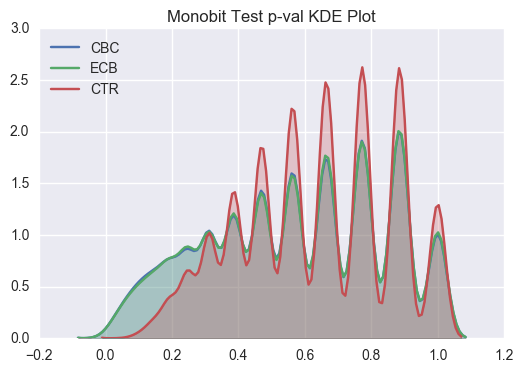

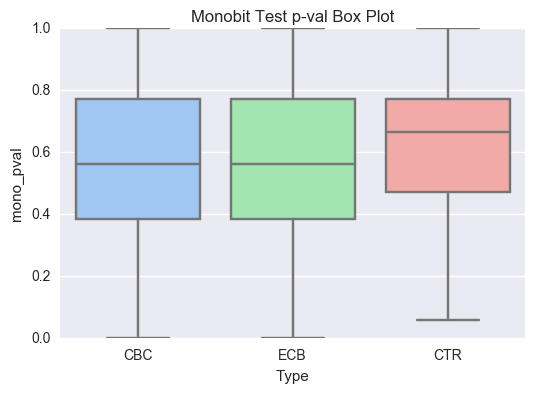

In [120]:
genPlots('mono_pval', 'Monobit', mono_results)

#### Frequency Test within a Block

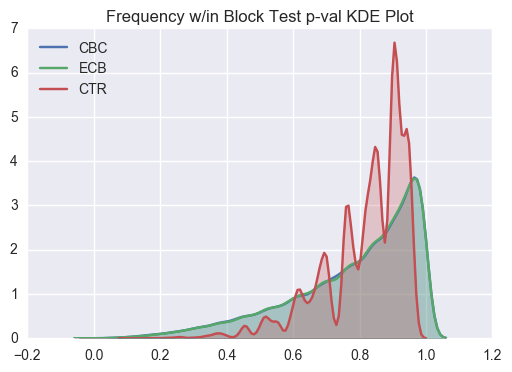

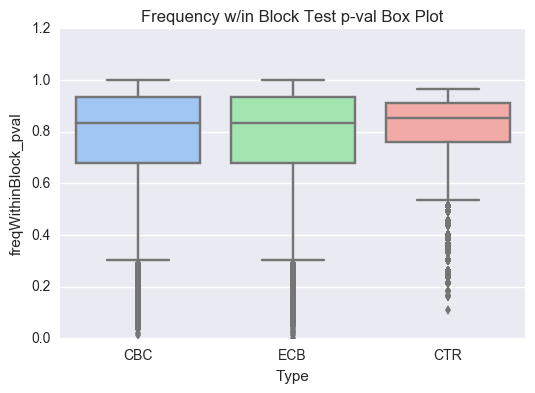

In [121]:
genPlots('freqWithinBlock_pval', 'Frequency w/in Block', freqWithinBlock_results)

#### The Runs Test

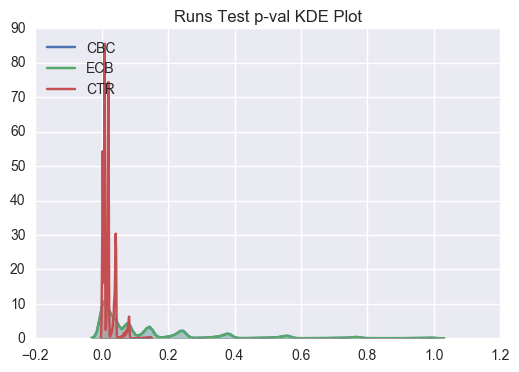

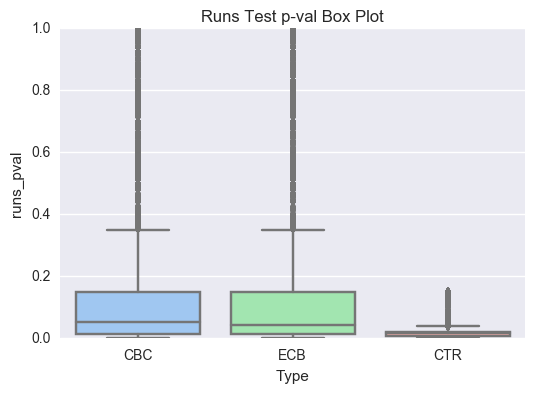

In [122]:
genPlots('runs_pval', 'Runs', runs_results)

#### Tests for the Longest-Run-of-Ones in a Block

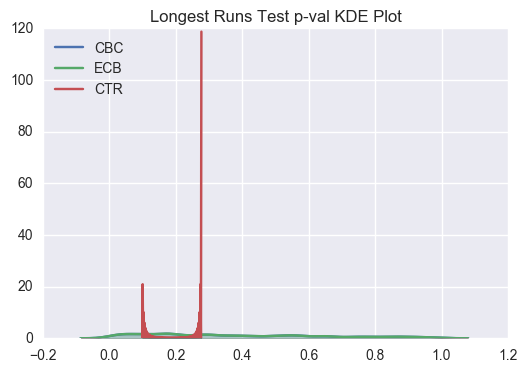

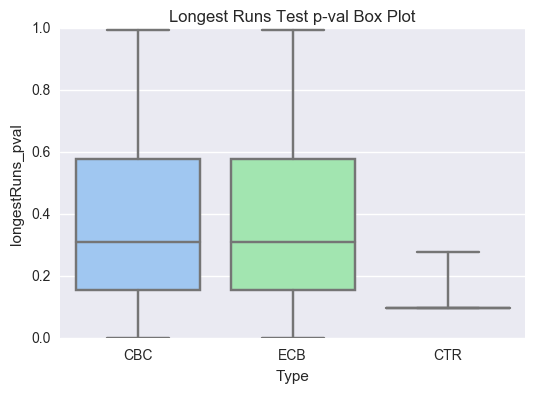

In [123]:
genPlots('longestRuns_pval', 'Longest Runs', longestRuns_results)

#### The Binary Matrix Rank Test
This test unable to produce results for our AES-128 ciphertexts

In [124]:
#genPlots('binMatrixRank_pval', 'Binary Matrix Rank', binMatrix_results)

In [125]:
binMatrix_results.describe()

,binMatrixRank_pval
count,300000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#### The Discrete Fourier Transform (Spectral) Test

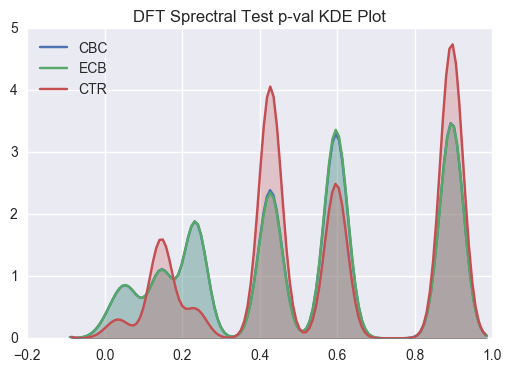

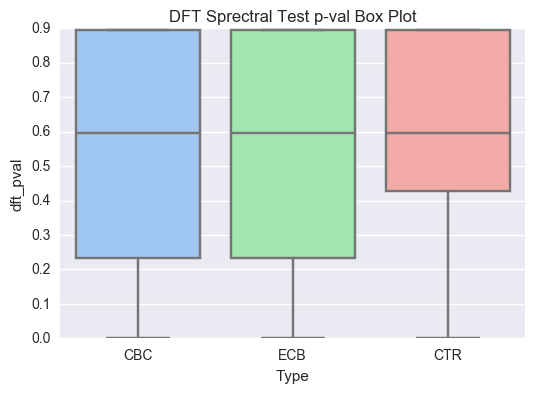

In [126]:
genPlots('dft_pval', 'DFT Sprectral', dft_results)

#### The Non-overlapping Template Matching Test

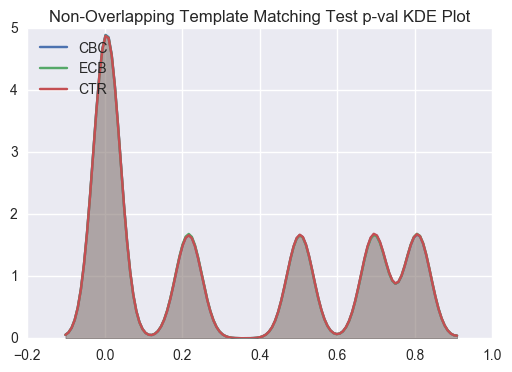

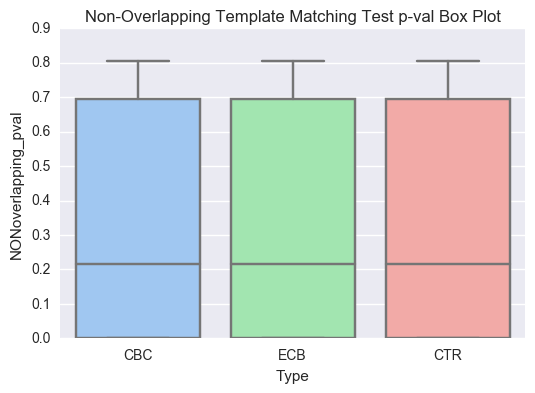

In [127]:
genPlots('NONoverlapping_pval', 'Non-Overlapping Template Matching', NONoverlapping_results)

#### The Overlapping Template Matching Test

This test unable to produce results for our AES-128 ciphertexts

In [128]:
#genPlots('overlapping_pval', 'Overlapping Template Matching', overlapping_results)

In [129]:
overlapping_results.describe()

,overlapping_pval
count,300000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#### Maurer's "Universal Statistical" Test

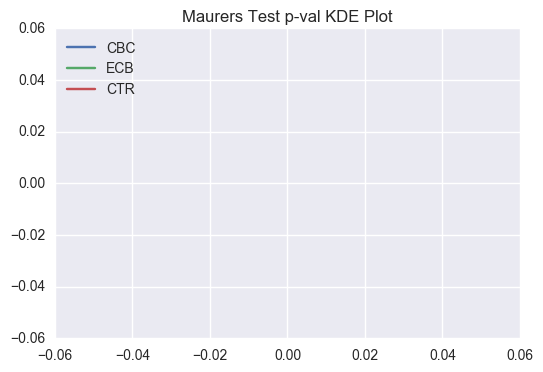

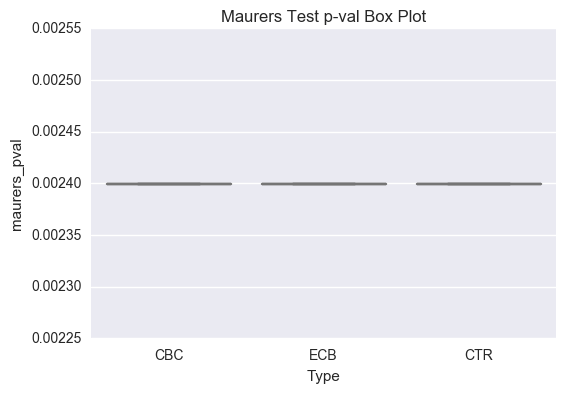

In [130]:
genPlots('maurers_pval', 'Maurers', maurers_results)

#### The Linear Complexity Test
This test unable to produce results for our AES-128 ciphertexts

In [131]:
linear_results.describe()

C:\Users\Owner\Anaconda2\envs\Py2DM\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,linear_pval
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [132]:
#genPlots('linear_pval', 'Linear Complexity', linear_results)

#### The Serial Test

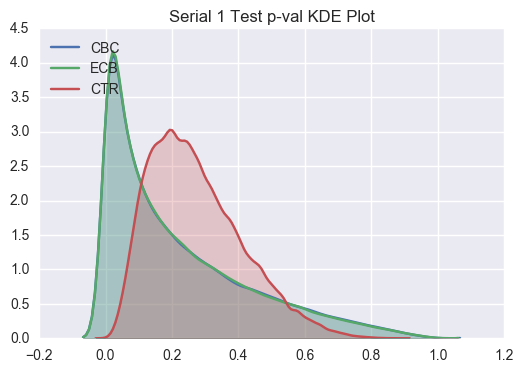

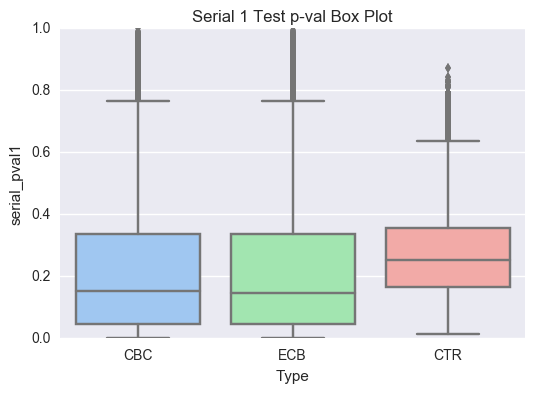

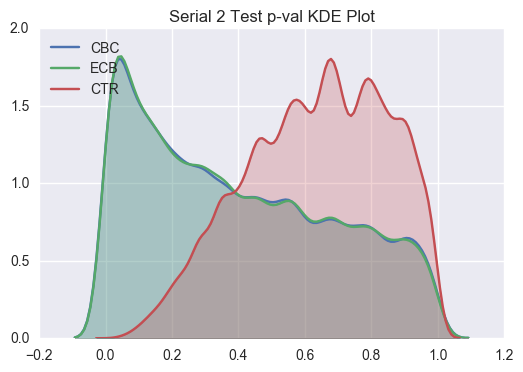

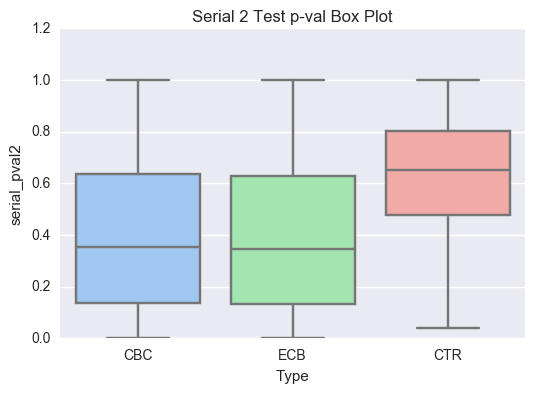

In [133]:
genPlots('serial_pval1', 'Serial 1', serial1_results)
genPlots('serial_pval2', 'Serial 2', serial2_results)

#### The Approximate Entropy Test

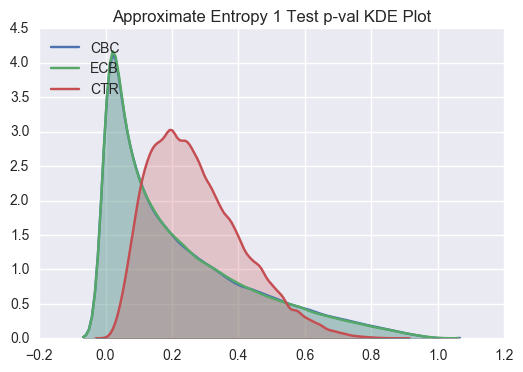

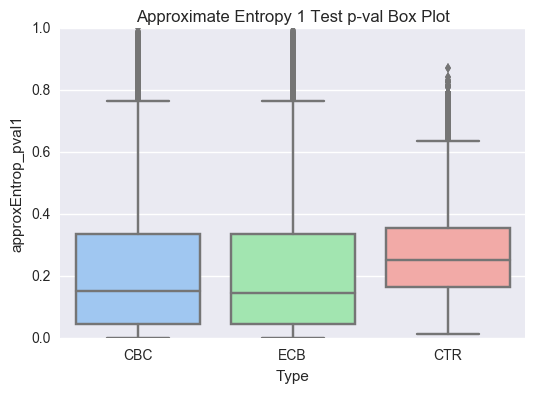

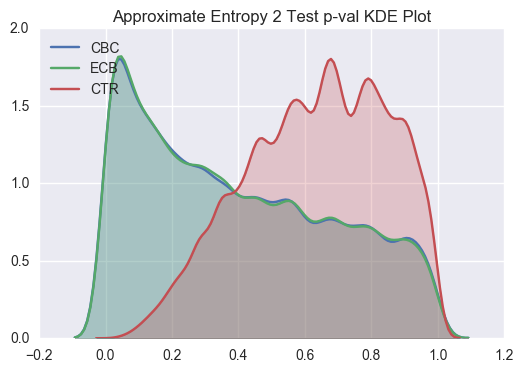

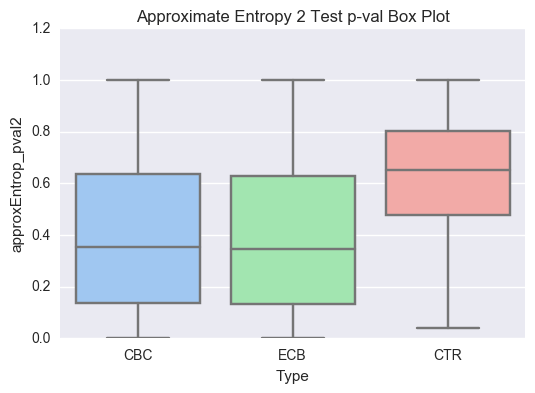

In [134]:
genPlots('approxEntrop_pval1', 'Approximate Entropy 1', approxEntrop1_results)
genPlots('approxEntrop_pval2', 'Approximate Entropy 2', approxEntrop2_results)

#### Cumulative Sums (Cusums) test

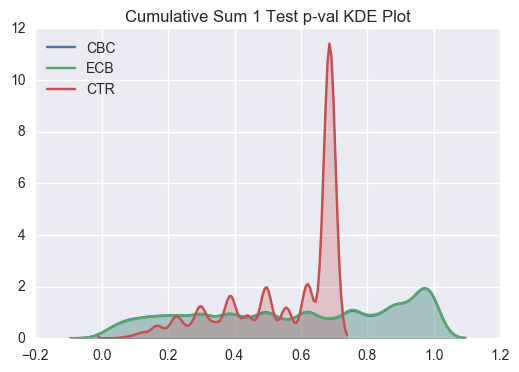

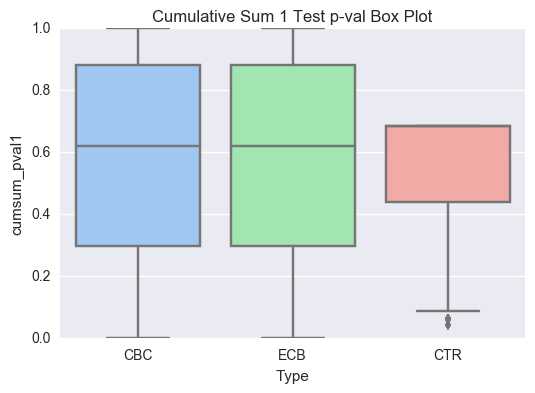

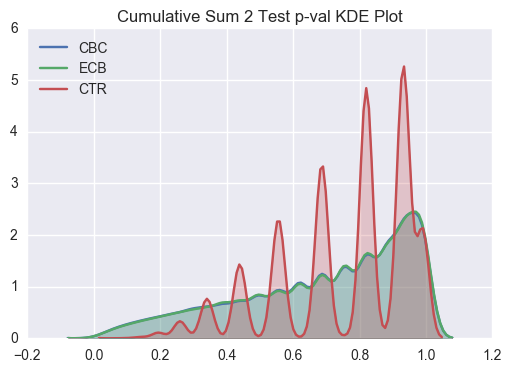

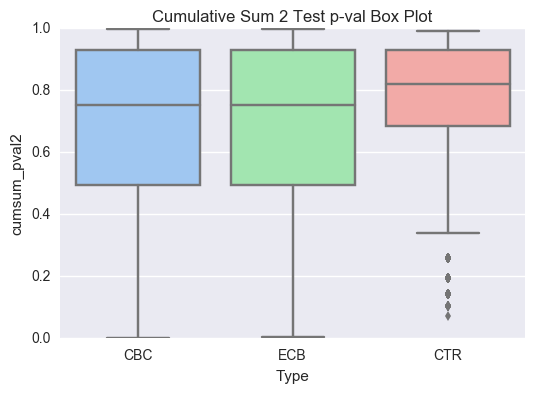

In [135]:
genPlots('cumsum_pval1', 'Cumulative Sum 1', cumsum1_results)
genPlots('cumsum_pval2', 'Cumulative Sum 2', cumsum2_results)

#### The Random Excursions Test

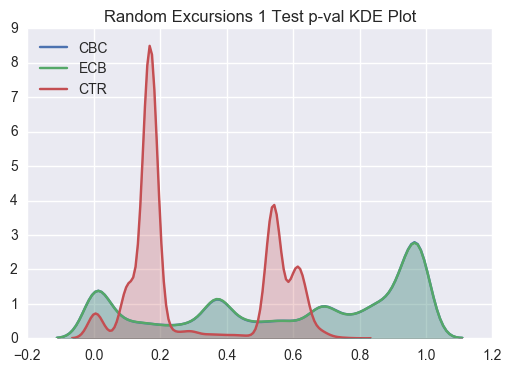

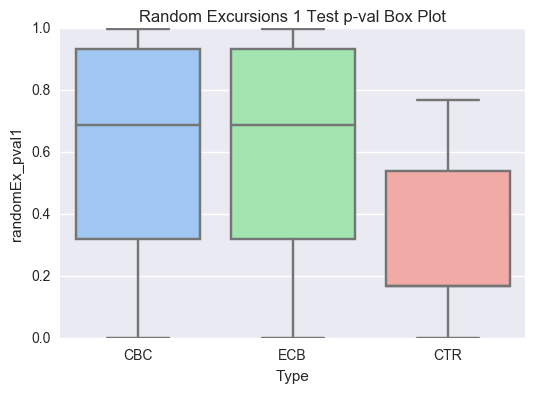

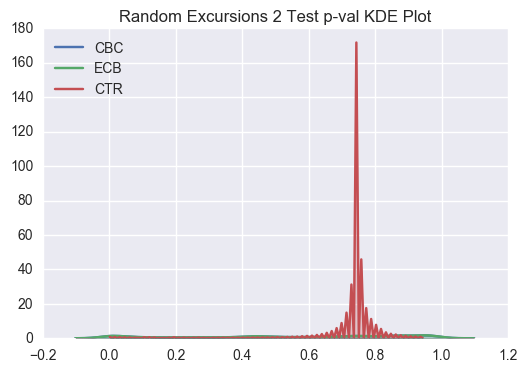

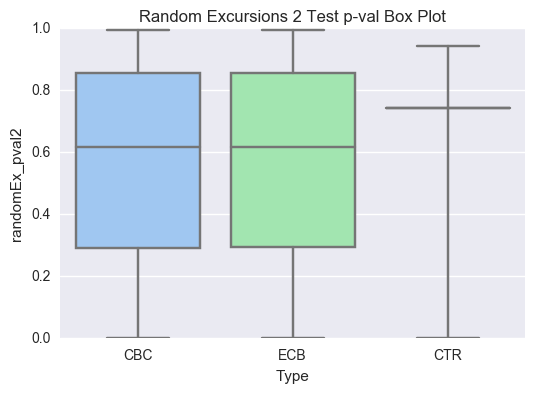

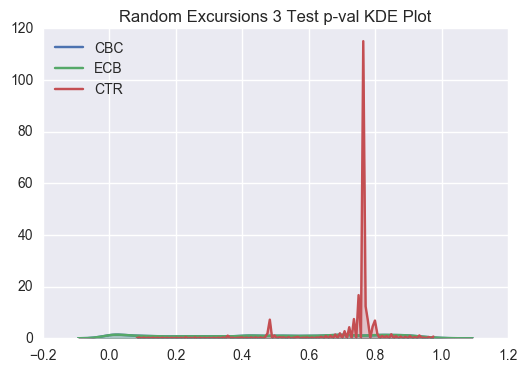

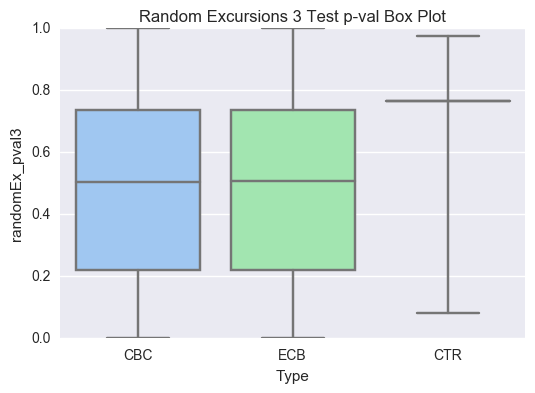

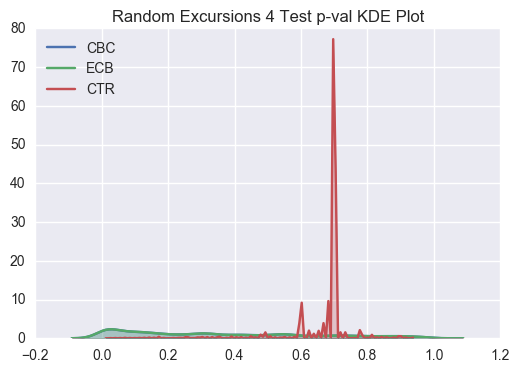

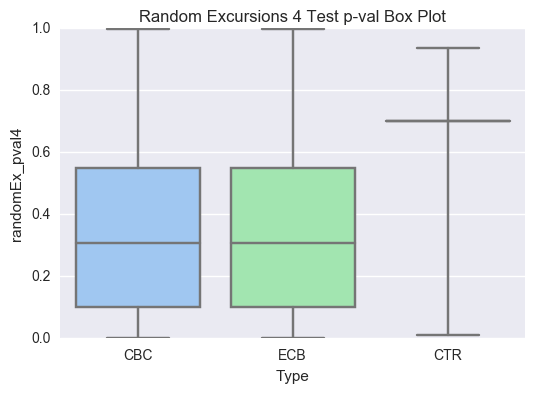

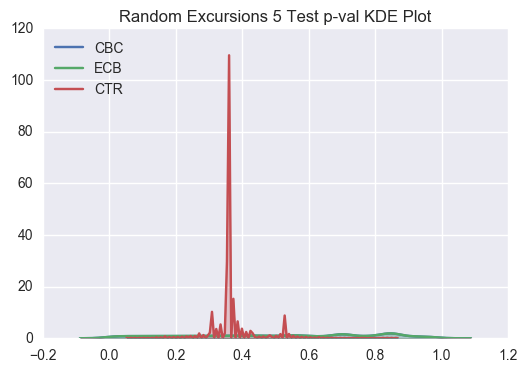

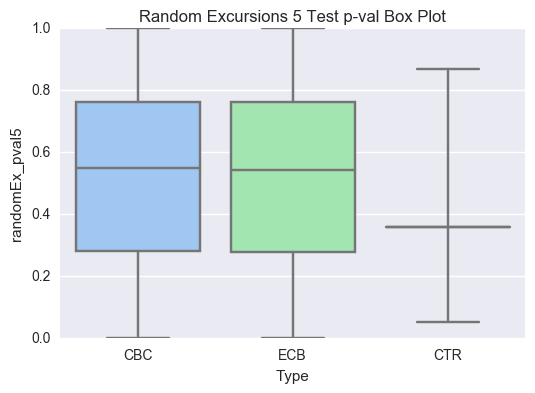

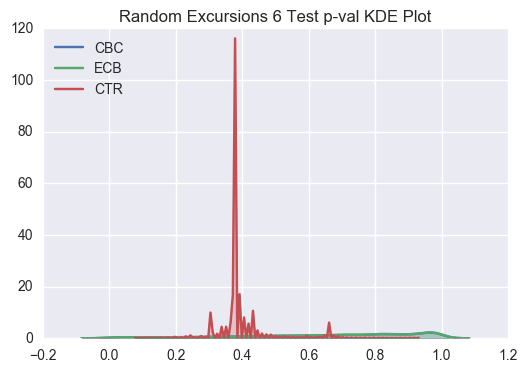

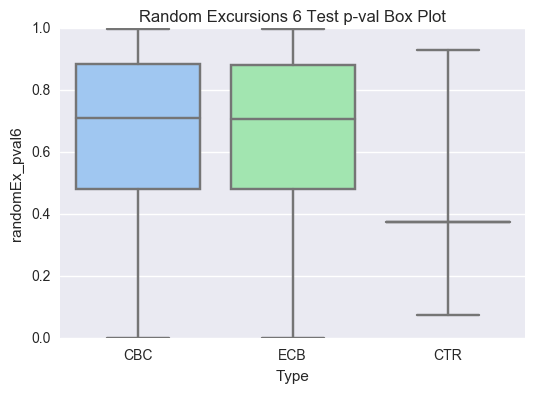

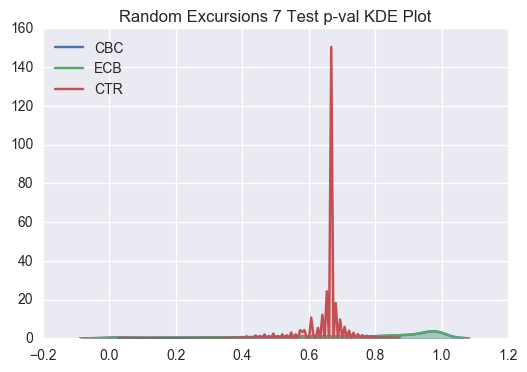

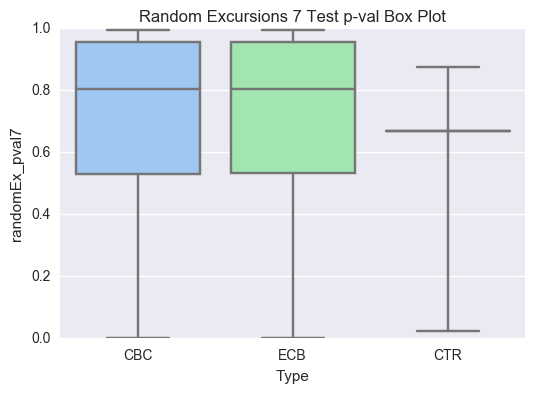

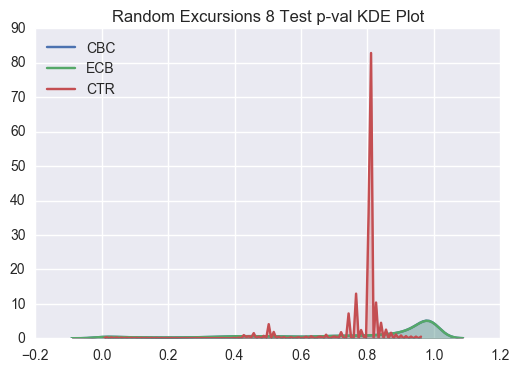

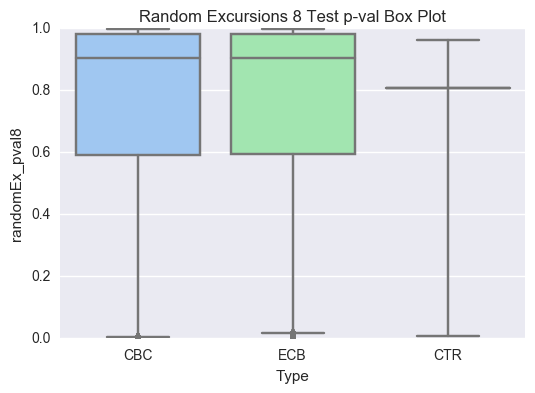

In [136]:
genPlots('randomEx_pval1', 'Random Excursions 1', randomEx1_results)
genPlots('randomEx_pval2', 'Random Excursions 2', randomEx2_results)
genPlots('randomEx_pval3', 'Random Excursions 3', randomEx3_results)
genPlots('randomEx_pval4', 'Random Excursions 4', randomEx4_results)
genPlots('randomEx_pval5', 'Random Excursions 5', randomEx5_results)
genPlots('randomEx_pval6', 'Random Excursions 6', randomEx6_results)
genPlots('randomEx_pval7', 'Random Excursions 7', randomEx7_results)
genPlots('randomEx_pval8', 'Random Excursions 8', randomEx8_results)

#### The Random Excursions Variant Test

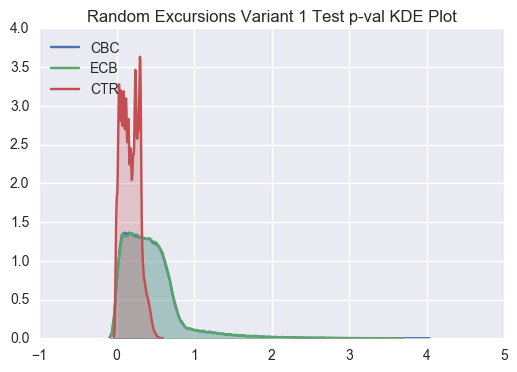

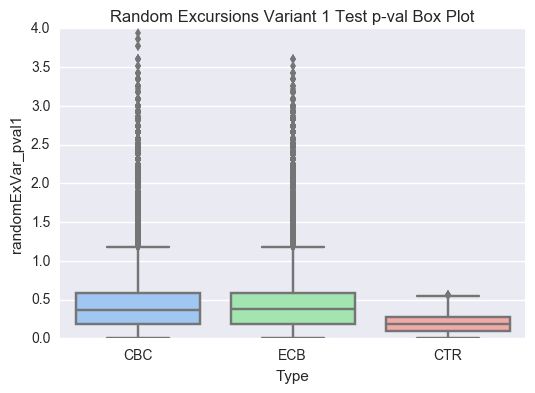

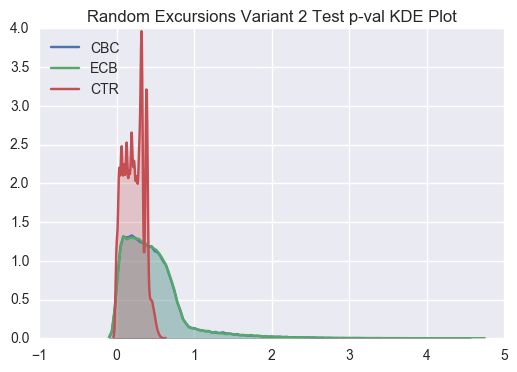

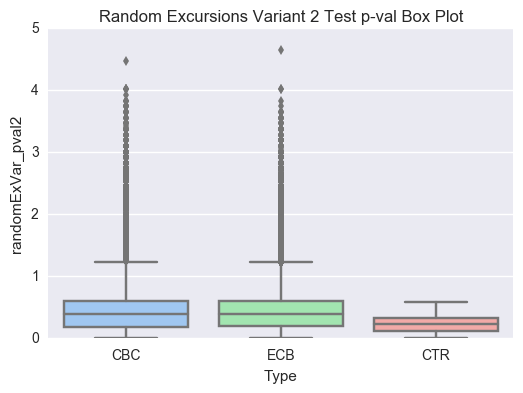

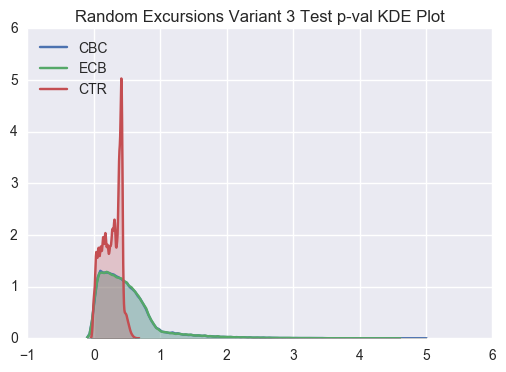

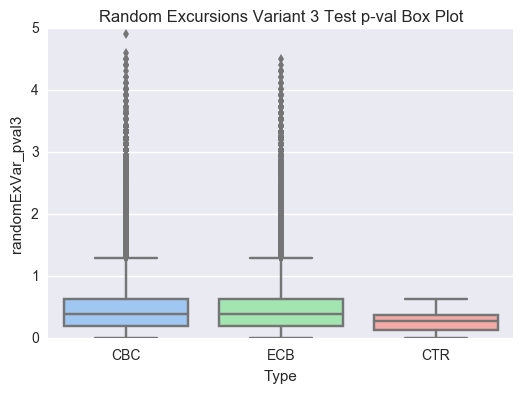

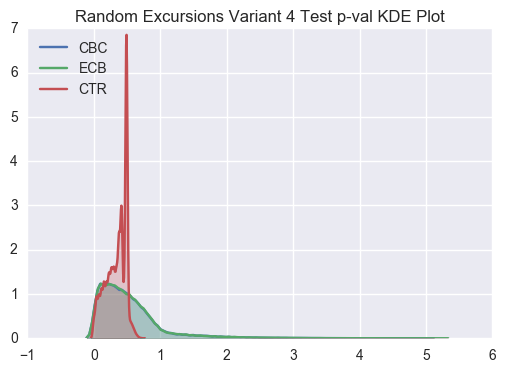

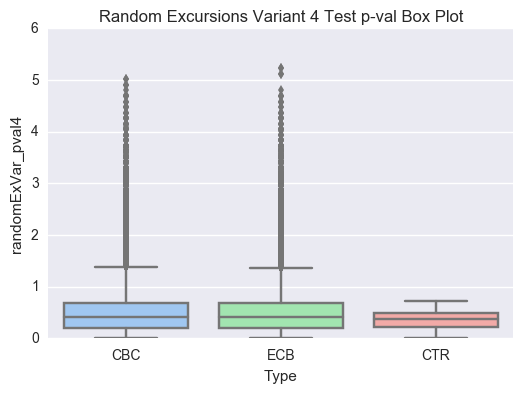

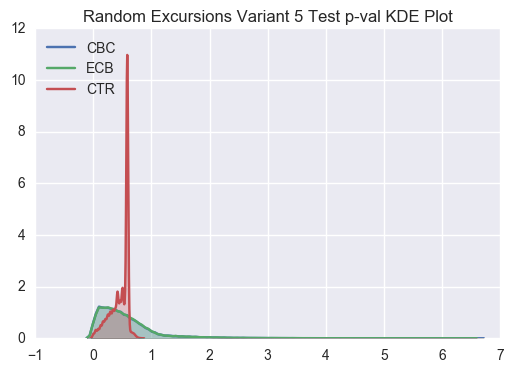

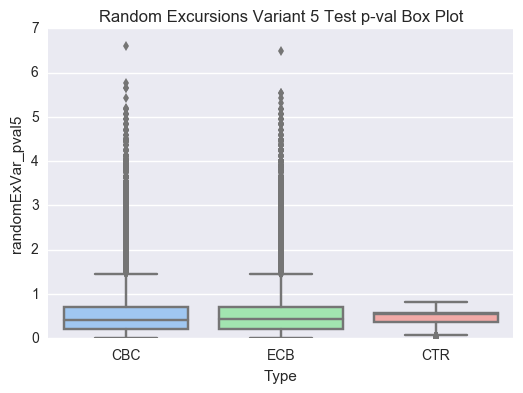

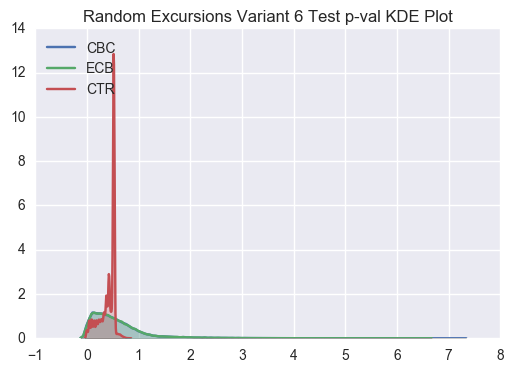

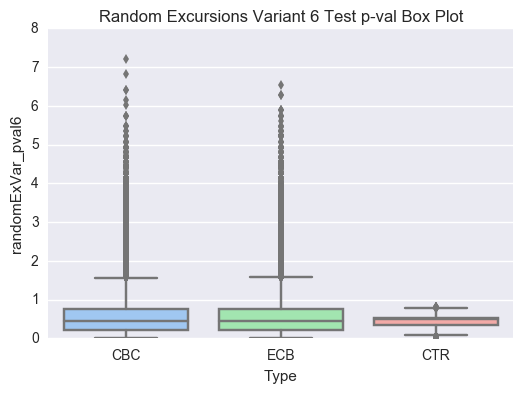

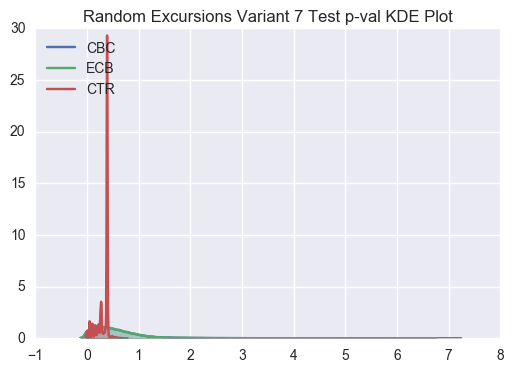

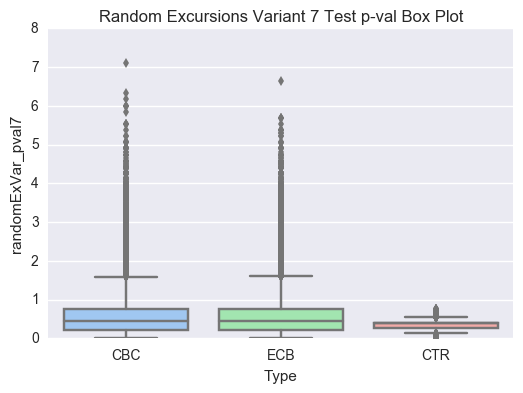

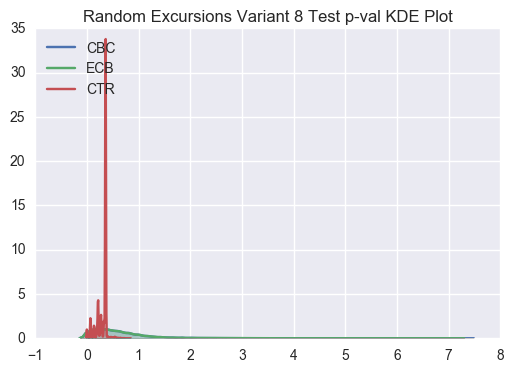

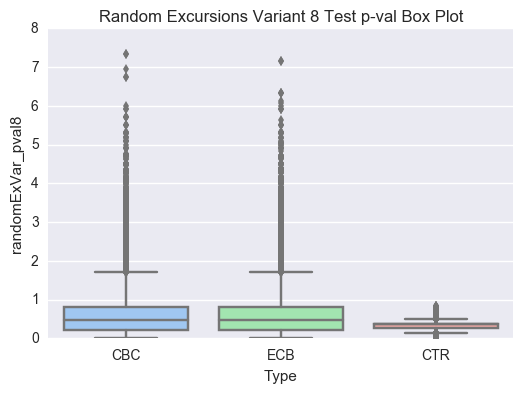

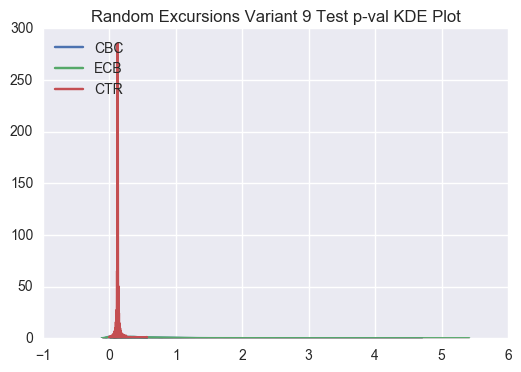

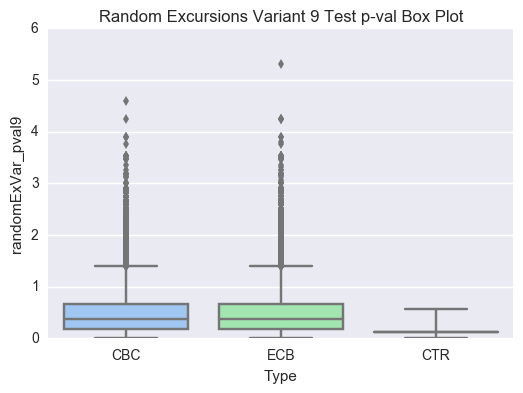

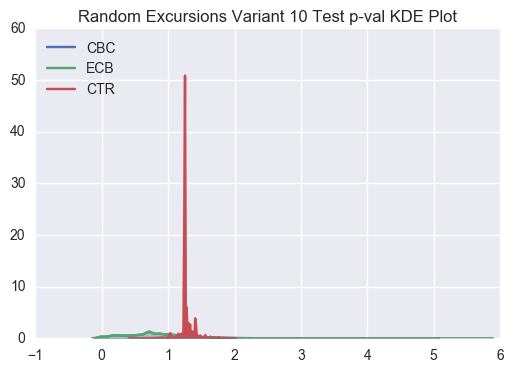

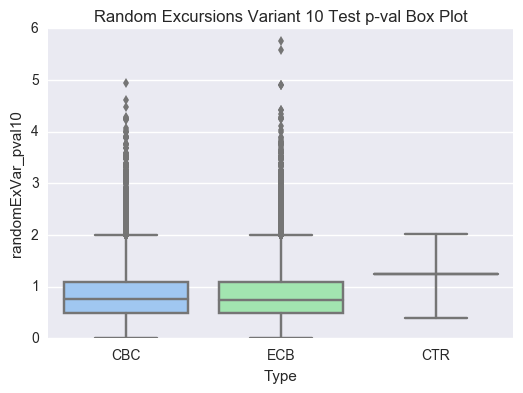

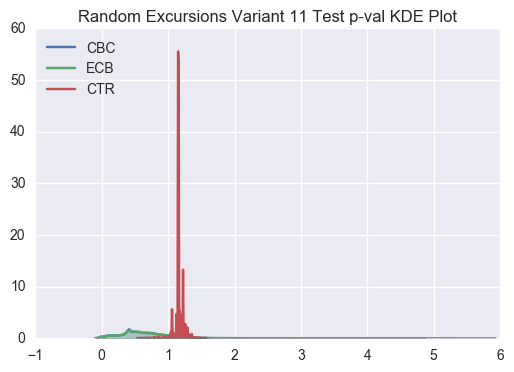

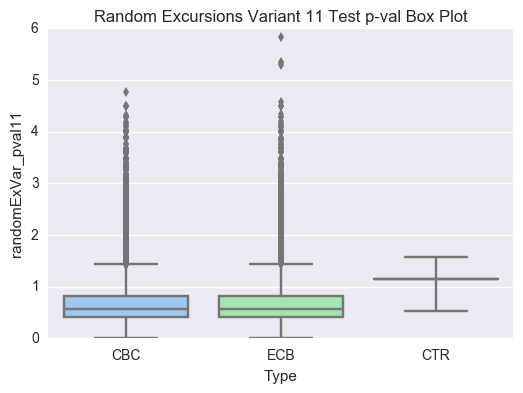

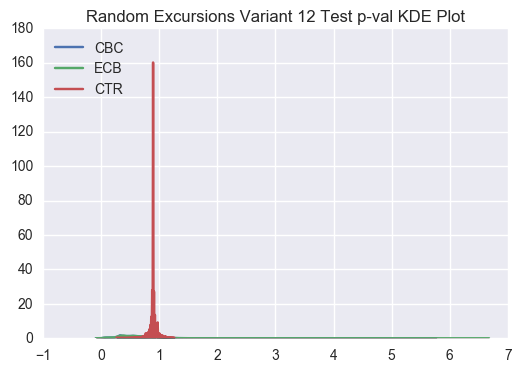

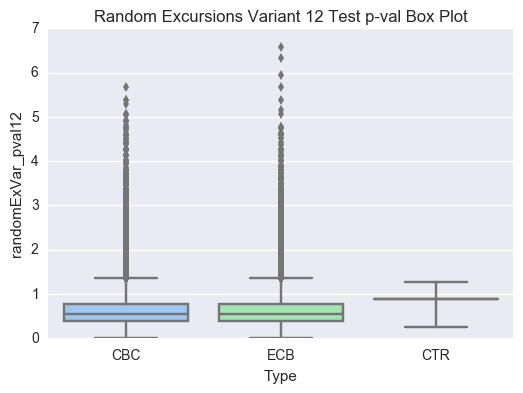

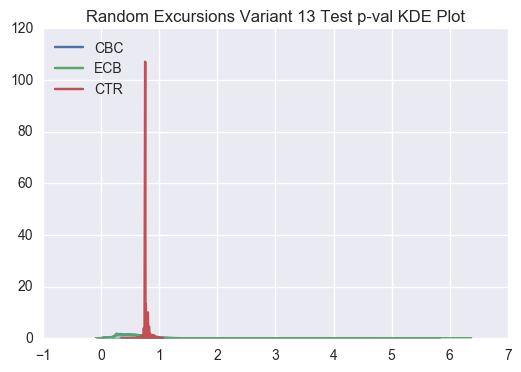

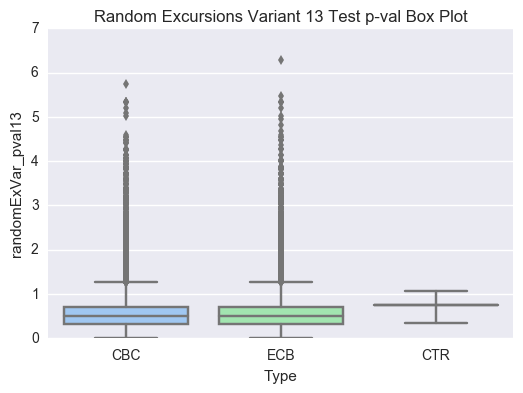

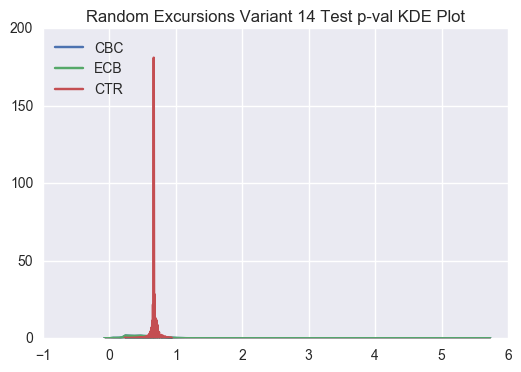

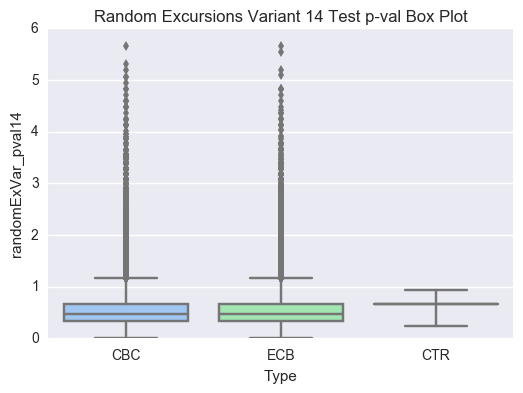

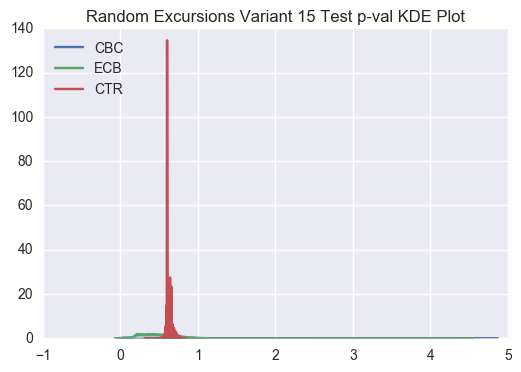

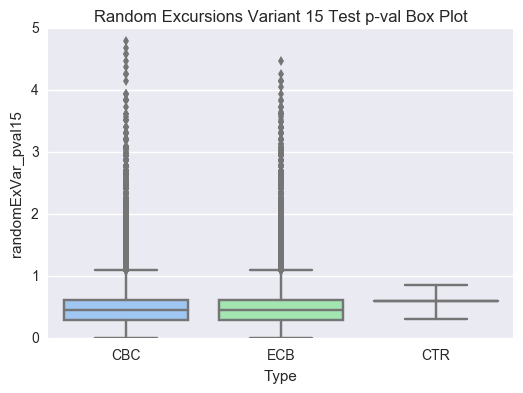

In [137]:
genPlots('randomExVar_pval1', 'Random Excursions Variant 1', randomExVar1_results)
genPlots('randomExVar_pval2', 'Random Excursions Variant 2', randomExVar2_results)
genPlots('randomExVar_pval3', 'Random Excursions Variant 3', randomExVar3_results)
genPlots('randomExVar_pval4', 'Random Excursions Variant 4', randomExVar4_results)
genPlots('randomExVar_pval5', 'Random Excursions Variant 5', randomExVar5_results)
genPlots('randomExVar_pval6', 'Random Excursions Variant 6', randomExVar6_results)
genPlots('randomExVar_pval7', 'Random Excursions Variant 7', randomExVar7_results)
genPlots('randomExVar_pval8', 'Random Excursions Variant 8', randomExVar8_results)
genPlots('randomExVar_pval9', 'Random Excursions Variant 9', randomExVar9_results)
genPlots('randomExVar_pval10', 'Random Excursions Variant 10', randomExVar10_results)
genPlots('randomExVar_pval11', 'Random Excursions Variant 11', randomExVar11_results)
genPlots('randomExVar_pval12', 'Random Excursions Variant 12', randomExVar12_results)
genPlots('randomExVar_pval13', 'Random Excursions Variant 13', randomExVar13_results)
genPlots('randomExVar_pval14', 'Random Excursions Variant 14', randomExVar14_results)
genPlots('randomExVar_pval15', 'Random Excursions Variant 15', randomExVar15_results)

### Perform ANOVA
In this section, we statistically compare the p-value results of each NIST test by AES encryption type.

#### Monobit Test

In [138]:
###Function contents inspired by https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
def doStats(results, pval):
    ## Perform ANOVA
    mod = ols(pval + ' ~ Type',
                    data=results).fit() 
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print aov_table
    print '\n'

    ## Calculating eta-squared value below
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    print 'eta^2 = ' + str(esq_sm)
    print '\n'

    ## Perform TukeyHSD post-hoc test

    mc = multi.MultiComparison(results[pval], results.Type)
    res = mc.tukeyhsd()
    print(res)

In [139]:
doStats(mono_results, 'mono_pval')

                sum_sq        df            F  PR(>F)
Type        212.422136       2.0  1672.918385     0.0
Residual  19046.357543  299997.0          NaN     NaN


eta^2 = 0.0110298855423


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 CBC    CTR    0.0572   0.0545 0.0598  True 
 CBC    ECB    0.0015  -0.0011 0.0041 False 
 CTR    ECB   -0.0557  -0.0583 -0.053  True 
--------------------------------------------


***Note that for monobit, CTR stands out as being statistically different from CBC and ECB***

#### Frequency Test within a Block

In [140]:
doStats(freqWithinBlock_results, 'freqWithinBlock_pval')

               sum_sq        df            F  PR(>F)
Type        83.158487       2.0  1442.568033     0.0
Residual  8646.835410  299997.0          NaN     NaN


eta^2 = 0.00952560657316


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.0358   0.034   0.0375  True 
 CBC    ECB    0.0009  -0.0009  0.0027 False 
 CTR    ECB   -0.0349  -0.0366 -0.0331  True 
---------------------------------------------


#### The Runs Test

In [141]:
doStats(runs_results, 'runs_pval')

               sum_sq        df             F  PR(>F)
Type       819.793685       2.0  18114.684086     0.0
Residual  6788.295202  299997.0           NaN     NaN


eta^2 = 0.107752905782


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR   -0.1108  -0.1124 -0.1092  True 
 CBC    ECB    0.0002  -0.0014  0.0017 False 
 CTR    ECB    0.111    0.1094  0.1125  True 
---------------------------------------------


#### Tests for the Longest-Run-of-Ones in a Block

In [142]:
doStats(longestRuns_results, 'longestRuns_pval')

                sum_sq        df             F  PR(>F)
Type       4714.057064       2.0  46459.164856     0.0
Residual  15219.849317  299997.0           NaN     NaN


eta^2 = 0.236484358551


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR   -0.2662  -0.2686 -0.2638  True 
 CBC    ECB   -0.0006  -0.0029  0.0018 False 
 CTR    ECB    0.2656   0.2633  0.268   True 
---------------------------------------------


#### The Binary Matrix Rank Test
This test unable to produce results for our AES-128 ciphertexts

In [143]:
#doStats(binMatrix_results, 'binMatrixRank_pval')

#### The Discrete Fourier Transform (Spectral) Test

In [144]:
doStats(dft_results, 'dft_pval')

                sum_sq        df            F  PR(>F)
Type        229.570654       2.0  1455.156737     0.0
Residual  23664.291891  299997.0          NaN     NaN


eta^2 = 0.00960793399625


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.0588   0.0559  0.0618  True 
 CBC    ECB    0.0003  -0.0027  0.0032 False 
 CTR    ECB   -0.0586  -0.0615 -0.0556  True 
---------------------------------------------


#### The Non-overlapping Template Matching Test

In [145]:
doStats(NONoverlapping_results, 'NONoverlapping_pval')

                sum_sq        df         F    PR(>F)
Type          0.063921       2.0  0.310194  0.733305
Residual  30909.653803  299997.0       NaN       NaN


eta^2 = 2.06797657428e-06


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 CBC    CTR    0.0011  -0.0023 0.0044 False 
 CBC    ECB    0.0002  -0.0031 0.0036 False 
 CTR    ECB   -0.0009  -0.0042 0.0025 False 
--------------------------------------------


#### The Overlapping Template Matching Test
This test unable to produce results for our AES-128 ciphertexts

In [146]:
#doStats(overlapping_results, 'overlapping_pval')

#### Maurer's "Universal Statistical" Test
This test produces identical values, therefore no need and unable to execute ANOVA

In [147]:
maurers_results.maurers_pval.unique()

array([ 0.00239892])

In [148]:
#doStats(maurers_results, 'maurers_pval')

#### The Linear Complexity Test
This test unable to produce results for our AES-128 ciphertexts

In [149]:
#doStats(linear_results, 'linear_pval')

#### The Serial Test

In [150]:
doStats(serial1_results.dropna(axis=0), 'serial_pval1')

                sum_sq        df            F  PR(>F)
Type        207.075509       2.0  2833.391798     0.0
Residual  10961.754371  299977.0          NaN     NaN


eta^2 = 0.0185404837248


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.055    0.053   0.057   True 
 CBC    ECB   -0.0015  -0.0035  0.0005 False 
 CTR    ECB   -0.0565  -0.0585 -0.0545  True 
---------------------------------------------


In [151]:
doStats(serial2_results.dropna(axis=0), 'serial_pval2')

                sum_sq        df             F  PR(>F)
Type       3789.288523       2.0  26582.594016     0.0
Residual  21380.520698  299977.0           NaN     NaN


eta^2 = 0.15054895686


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.2379   0.2352  0.2407  True 
 CBC    ECB   -0.0009  -0.0037  0.0019 False 
 CTR    ECB   -0.2389  -0.2417 -0.2361  True 
---------------------------------------------


#### The Approximate Entropy Test

In [152]:
doStats(approxEntrop1_results.dropna(axis=0), 'approxEntrop_pval1')

                sum_sq        df            F  PR(>F)
Type        207.075509       2.0  2833.391798     0.0
Residual  10961.754371  299977.0          NaN     NaN


eta^2 = 0.0185404837248


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.055    0.053   0.057   True 
 CBC    ECB   -0.0015  -0.0035  0.0005 False 
 CTR    ECB   -0.0565  -0.0585 -0.0545  True 
---------------------------------------------


In [153]:
doStats(approxEntrop2_results.dropna(axis=0), 'approxEntrop_pval2')

                sum_sq        df             F  PR(>F)
Type       3789.288523       2.0  26582.594016     0.0
Residual  21380.520698  299977.0           NaN     NaN


eta^2 = 0.15054895686


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.2379   0.2352  0.2407  True 
 CBC    ECB   -0.0009  -0.0037  0.0019 False 
 CTR    ECB   -0.2389  -0.2417 -0.2361  True 
---------------------------------------------


#### Cumulative Sums (Cusums) test

In [154]:
doStats(cumsum1_results, 'cumsum_pval1')

                sum_sq        df           F         PR(>F)
Type         50.234151       2.0  359.453608  1.196826e-156
Residual  20962.503054  299997.0         NaN            NaN


eta^2 = 0.00239065243751


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR   -0.0261  -0.0288 -0.0233  True 
 CBC    ECB    0.0026  -0.0002  0.0053 False 
 CTR    ECB    0.0286   0.0259  0.0314  True 
---------------------------------------------


In [155]:
doStats(cumsum2_results, 'cumsum_pval2')

                sum_sq        df            F  PR(>F)
Type        272.975390       2.0  2432.896271     0.0
Residual  16830.104724  299997.0          NaN     NaN


eta^2 = 0.0159605982132


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR    0.0648   0.0623  0.0673  True 
 CBC    ECB    0.0016  -0.0009  0.0041 False 
 CTR    ECB   -0.0632  -0.0656 -0.0607  True 
---------------------------------------------


#### The Random Excursions Test

In [156]:
for i, r in enumerate([randomEx1_results,
              randomEx2_results,
              randomEx3_results,
              randomEx4_results,
              randomEx5_results,
              randomEx6_results,
              randomEx7_results,
              randomEx8_results]):
    print '\n'
    print '*'*50
    print 'Random Excursions' + str(i+1)
    doStats(r, 'randomEx_pval'+str(i+1))



**************************************************
Random Excursions1
                sum_sq        df             F  PR(>F)
Type       5301.099063       2.0  27518.319705     0.0
Residual  28895.547269  299997.0           NaN     NaN


eta^2 = 0.155018097726


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 CBC    CTR   -0.2822  -0.2855 -0.279  True 
 CBC    ECB   -0.0005  -0.0038 0.0027 False 
 CTR    ECB    0.2817   0.2785 0.285   True 
--------------------------------------------


**************************************************
Random Excursions2
                sum_sq        df             F  PR(>F)
Type       2063.323975       2.0  14222.196513     0.0
Residual  21761.441774  299997.0           NaN     NaN


eta^2 = 0.086604166312


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    

#### The Random Excursions Variant Test

In [157]:
for i, r in enumerate([randomExVar1_results,
                       randomExVar2_results,
                       randomExVar3_results,
                       randomExVar4_results,
                       randomExVar5_results,
                       randomExVar6_results,
                       randomExVar7_results,
                       randomExVar8_results,
                       randomExVar9_results,
                       randomExVar10_results,
                       randomExVar11_results,
                       randomExVar12_results,
                       randomExVar13_results,
                       randomExVar14_results,
                       randomExVar15_results,
                       randomExVar16_results,
                       randomExVar17_results,
                       randomExVar18_results]):
    print '\n'
    print '*'*50
    print 'Random Excursions Variant' + str(i+1)
    doStats(r, 'randomExVar_pval'+str(i+1))



**************************************************
Random Excursions Variant1
                sum_sq        df             F  PR(>F)
Type       4264.638210       2.0  23597.982732     0.0
Residual  27107.797382  299997.0           NaN     NaN


eta^2 = 0.135935834418


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 CBC    CTR   -0.2527  -0.2558 -0.2495  True 
 CBC    ECB    0.0005  -0.0027  0.0036 False 
 CTR    ECB    0.2532    0.25   0.2563  True 
---------------------------------------------


**************************************************
Random Excursions Variant2
                sum_sq        df             F  PR(>F)
Type       3743.141258       2.0  17187.609226     0.0
Residual  32666.880341  299997.0           NaN     NaN


eta^2 = 0.102805246835


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
--------------------------------

### Final aggregations of passing vs. failing ciphertexts

In this section, we provide the final aggregated results of passing vs. failing counts among the three AES encryption types. These final counts are based on the number of passing vs. failing tests for each ciphertext.

#### Get total number and percentage passing tests for each AES encryption type
First calculate total number passing by totaling tests with p-values > 0.01 for each ciphertext. Then calculate percentage passing vs. failing for each ciphertext.

In [158]:
CBC_df = pd.concat([CBC_df15.iloc[:,0:3], CBC_df15.iloc[:,3:len(CBC_df15.columns)] > 0.01], axis=1)
CBC_df['total_passing'] = CBC_df.select_dtypes(include=['bool']).sum(axis=1)
CBC_df['percent_passing'] = CBC_df['total_passing']/len(CBC_df.select_dtypes(include=['bool']).columns)

ECB_df = pd.concat([ECB_df15.iloc[:,0:3], ECB_df15.iloc[:,3:len(ECB_df15.columns)] > 0.01], axis=1)
ECB_df['total_passing'] = ECB_df.select_dtypes(include=['bool']).sum(axis=1)
ECB_df['percent_passing'] = ECB_df['total_passing']/len(ECB_df.select_dtypes(include=['bool']).columns)

CTR_df = pd.concat([CTR_df15.iloc[:,0:3], CTR_df15.iloc[:,3:len(CTR_df15.columns)] > 0.01], axis=1)
CTR_df['total_passing'] = CTR_df.select_dtypes(include=['bool']).sum(axis=1)
CTR_df['percent_passing'] = CTR_df['total_passing']/len(CTR_df.select_dtypes(include=['bool']).columns)

CBC_passing = pd.DataFrame({'Type':'CBC', 'total_passing':CBC_df['total_passing'], 'percent_passing':CBC_df['percent_passing']})
ECB_passing = pd.DataFrame({'Type':'ECB', 'total_passing':ECB_df['total_passing'], 'percent_passing':ECB_df['percent_passing']})
CTR_passing = pd.DataFrame({'Type':'CTR', 'total_passing':CTR_df['total_passing'], 'percent_passing':CTR_df['percent_passing']})
passing_totals = pd.concat([CBC_passing,ECB_passing,CTR_passing])

Visualize resulting percentage passing distributions.

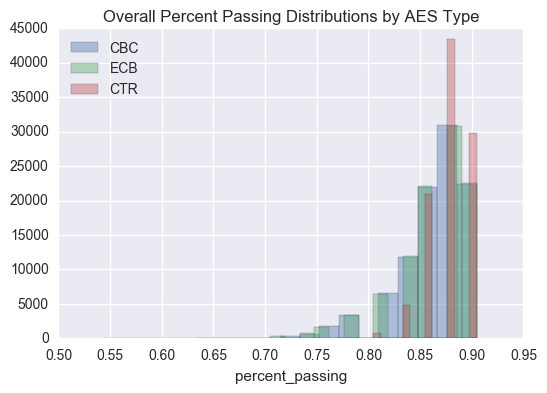

In [172]:
sns.distplot(CBC_passing['percent_passing'], label='CBC', bins=20, kde=False).set_title("Overall Percent Passing Distributions by AES Type")
sns.distplot(ECB_passing['percent_passing'], label='ECB', bins=20, kde=False)
sns.distplot(CTR_passing['percent_passing'], label='CTR', bins=20, kde=False)
plt.legend(bbox_to_anchor=(0.2,1))
plt.show()

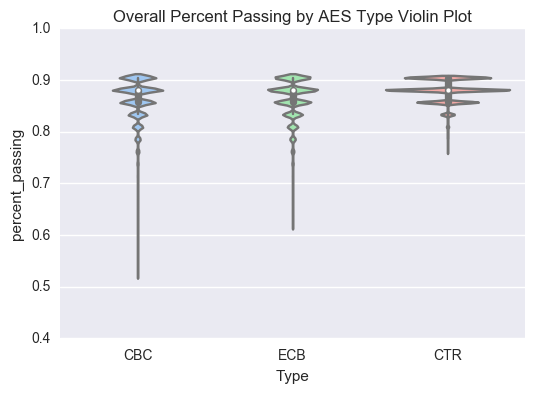

In [173]:
sns.violinplot(x='Type', y='percent_passing', data=passing_totals, palette='pastel').set_title("Overall Percent Passing by AES Type Violin Plot")
plt.show()

Final look at distribution statistical significance...

In [161]:
doStats(passing_totals, 'percent_passing')

              sum_sq        df            F  PR(>F)
Type       18.039102       2.0  8348.350328     0.0
Residual  324.116513  299997.0          NaN     NaN


eta^2 = 0.0527219222293


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 CBC    CTR    0.0166   0.0162 0.0169  True 
 CBC    ECB    0.0002  -0.0001 0.0006 False 
 CTR    ECB   -0.0163  -0.0167 -0.016  True 
--------------------------------------------


### Look at percent passing for each test type

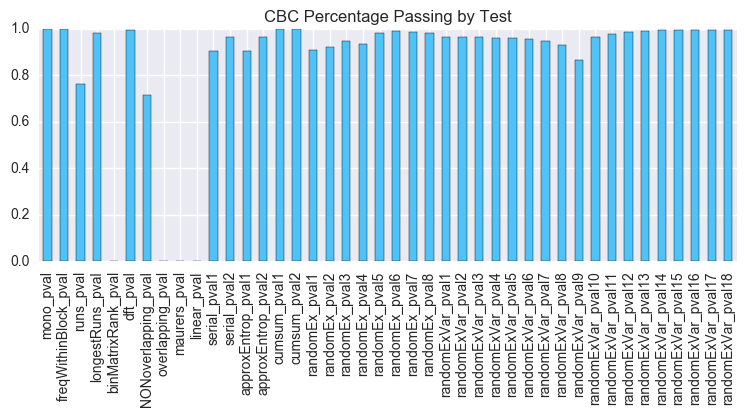

In [168]:
CBC_TestPerc = CBC_df.select_dtypes(include=['bool']).sum(axis=0)
CBC_TestPerc = CBC_TestPerc/len(CBC_df.select_dtypes(include=['bool']))
CBC_TestPerc.plot('bar', figsize=(9, 3), color='#4FC3F7', title='CBC Percentage Passing by Test')

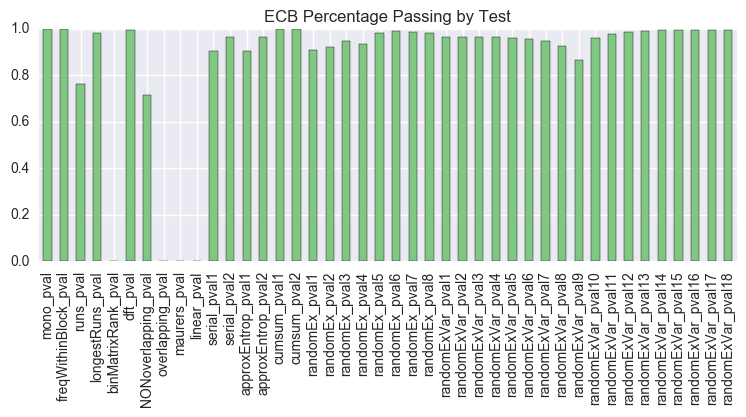

In [169]:
ECB_TestPerc = ECB_df.select_dtypes(include=['bool']).sum(axis=0)
ECB_TestPerc = ECB_TestPerc/len(ECB_df.select_dtypes(include=['bool']))
ECB_TestPerc.plot('bar', figsize=(9, 3), color='#81C784', title='ECB Percentage Passing by Test')

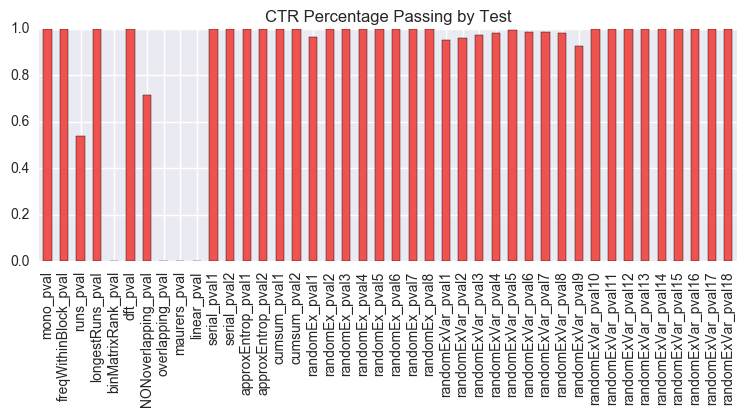

In [170]:
CTR_TestPerc = CTR_df.select_dtypes(include=['bool']).sum(axis=0)
CTR_TestPerc = CTR_TestPerc/len(CTR_df.select_dtypes(include=['bool']))
CTR_TestPerc.plot('bar', figsize=(9, 3), color='#EF5350', title='CTR Percentage Passing by Test')

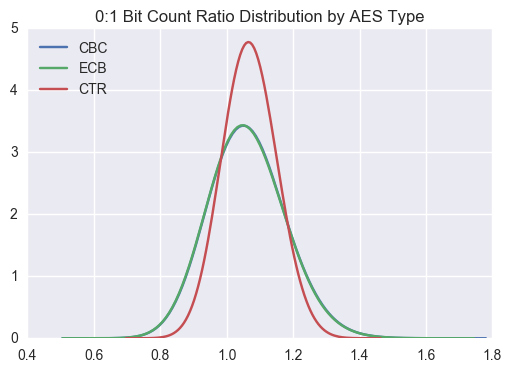

In [203]:
sns.kdeplot(CBC_df15.CBC_0Count/CBC_df15.CBC_1Count, label='CBC', bw=0.05).set_title("0:1 Bit Count Ratio Distribution by AES Type")
sns.kdeplot(ECB_df15.ECB_0Count/ECB_df15.ECB_1Count, label='ECB', bw=0.05)
sns.kdeplot(CTR_df15.CTR_0Count/CTR_df15.CTR_1Count, label='CTR', bw=0.05)
plt.legend(bbox_to_anchor=(0.2,1))
plt.show()

#### Output test results to CSV

In [179]:
CBC_df15.to_csv('Outputs/CBC_testResultPValues.csv', index=False)
ECB_df15.to_csv('Outputs/ECB_testResultPValues.csv', index=False)
CTR_df15.to_csv('Outputs/CTR_testResultPValues.csv', index=False)

CBC_df.to_csv('Outputs/CBC_testResultsBool.csv', index=False)
ECB_df.to_csv('Outputs/ECB_testResultsBool.csv', index=False)
CTR_df.to_csv('Outputs/CTR_testResultsBool.csv', index=False)